Merton default probability model

In [1]:
import numpy as np
from scipy.stats import norm

def merton_pd(asset_value, debt_value, asset_volatility, risk_free_rate, time_horizon):
    """
    Calculate the probability of default using the Merton model.
    
    Parameters:
        asset_value (float): Current value of the company's assets.
        debt_value (float): Total debt obligation at the maturity time.
        asset_volatility (float): Volatility of the company's assets (annualized).
        risk_free_rate (float): Risk-free interest rate (annualized).
        time_horizon (float): Time horizon for debt maturity (in years).
    
    Returns:
        float: Probability of default.
    """
    # Calculate d1 and d2 based on the Merton model
    d1 = (np.log(asset_value / debt_value) + (risk_free_rate + 0.5 * asset_volatility ** 2) * time_horizon) / \
         (asset_volatility * np.sqrt(time_horizon))
    d2 = d1 - asset_volatility * np.sqrt(time_horizon)
    
    # Probability of default
    pd = norm.cdf(-d2)  # Using -d2 for the probability of default
    
    return pd

# Example usage
asset_value = 100  # Example asset value
debt_value = 80    # Example debt value (debt due at maturity)
asset_volatility = 0.3  # Asset volatility (30% annualized)
risk_free_rate = 0.05   # Risk-free interest rate (5% annualized)
time_horizon = 1        # Time to debt maturity in years (e.g., 1 year)

pd = merton_pd(asset_value, debt_value, asset_volatility, risk_free_rate, time_horizon)
print(f"Probability of Default: {pd:.4f}")

Probability of Default: 0.2235


1. Incorporate Multiple Debt Layers (done)

	•	Current Limitation: The basic Merton model assumes a single debt maturity, but real firms often have multiple layers of debt with different maturities and priorities (senior, subordinated).
	•	Enhancement: Calculate a weighted probability of default across multiple maturities or prioritize senior debt (e.g., first apply the Merton model to short-term debt, then gradually add longer-term liabilities).
	•	Implementation: Adjust debt_value to reflect debt’s present value, or apply separate Merton calculations for each debt tier and combine results (e.g., via Monte Carlo simulation).

2. Dynamic Asset Volatility (done)

	•	Current Limitation: The model assumes a constant asset volatility over time, but volatility can fluctuate due to economic conditions, operational changes, or financial performance.
	•	Enhancement: Model volatility as a stochastic process, such as a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model, or use historical and implied volatilities.
	•	Implementation: Update asset_volatility dynamically using a time series model or market data to capture changing risk levels.

3. Leverage Market Information for Realistic Parameters (on real data)

	•	Current Limitation: Asset values and volatilities are often estimated rather than observed, leading to parameter estimation issues.
	•	Enhancement: Use market indicators (e.g., stock prices, credit spreads, bond yields) to infer asset values and volatilities more accurately.
	•	Implementation: Calculate implied asset values and volatilities by reverse-engineering from equity prices using an iterative approach (e.g., solving for asset value iteratively based on observed market equity and debt).

4. Stochastic Interest Rates (done)

	•	Current Limitation: The Merton model assumes a constant risk-free interest rate, which is unrealistic in fluctuating market conditions.
	•	Enhancement: Use stochastic models like the Vasicek or CIR model for the interest rate to reflect interest rate variability over time.
	•	Implementation: Adjust the risk_free_rate in each time period according to a stochastic process, increasing or decreasing it as predicted by these models.

5. Time-Varying Capital Structure (done)

	•	Current Limitation: The Merton model assumes the firm’s capital structure (debt vs. equity) remains constant until maturity.
	•	Enhancement: Model capital structure as dynamic, allowing for changes due to refinancing, dividend policies, or new debt issuance.
	•	Implementation: Update the debt_value periodically based on expected financing changes or adjust it according to leverage ratios observed in market data.

6. Incorporate Macroeconomic and Sector-Specific Risk (done)

	•	Current Limitation: The Merton model does not factor in macroeconomic conditions, such as GDP growth, inflation, or industry trends, which affect default probability.
	•	Enhancement: Use a multi-factor model that includes economic variables (e.g., GDP, inflation, sector growth rates) and adjust asset volatility and probability of default accordingly.
	•	Implementation: Define external risk variables and introduce regression or machine learning models to relate these factors to default probability, creating a broader risk context.

7. Use Default Correlation (for Portfolios) (done)

	•	Current Limitation: The Merton model calculates the probability of default in isolation for a single firm.
	•	Enhancement: For portfolios, consider default correlation, which is the likelihood of multiple firms defaulting together.
	•	Implementation: Use copula models or factor models (e.g., Gaussian copulas) to simulate correlated defaults in a portfolio, adjusting the default calculation based on shared risk factors (such as economic downturns).

8. Stress Testing and Scenario Analysis (done)

	•	Current Limitation: The model provides a single probability of default without accounting for worst-case scenarios.
	•	Enhancement: Perform scenario analysis or stress testing by simulating extreme conditions (e.g., economic recession, high-interest rates) and observing how the probability of default changes.
	•	Implementation: Adjust parameters (e.g., increase asset_volatility, reduce asset_value) based on stress scenarios, or create Monte Carlo simulations to understand default probability under different conditions.

Multiple Scenarios included. Looking for the way to increase accuracy 

In [13]:
import numpy as np
from scipy.stats import norm

def vasicek_model(r, a, b, sigma, dt):
    """
    Simulate one step of the Vasicek model for interest rates.
    """
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """
    Randomly adjust debt value based on leverage ratio constraints.
    """
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """
    Simulate macroeconomic factors based on specified scenario.
    """
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),  # Strong contraction
            'inflation': np.random.uniform(0.01, 0.03),     # Lower inflation due to decreased demand
            'interest_rate': np.random.uniform(0.02, 0.04), # Low-interest environment
            'sector_growth': np.random.uniform(-0.05, -0.02),
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),   # Modest growth or stagnation
            'inflation': np.random.uniform(0.06, 0.1),     # High inflation environment
            'interest_rate': np.random.uniform(0.05, 0.08), # Higher interest rates
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),  # Near zero growth
            'inflation': np.random.uniform(0.02, 0.04),    # Moderate inflation
            'interest_rate': np.random.uniform(0.03, 0.05), # Neutral interest rate
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """
    Adjust asset volatility based on macroeconomic factors.
    """
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)  # Ensure minimum volatility level

def adjust_default_probability(base_pd, macro_factors):
    """
    Adjust the probability of default based on macroeconomic factors.
    """
    adjustment_factor = 1 + 2 * (-macro_factors['gdp_growth']) + 1.5 * macro_factors['inflation']
    adjusted_pd = base_pd * adjustment_factor
    return min(1.0, adjusted_pd)  # Ensure probability does not exceed 100%

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base"):
    """
    Calculate the probability of default considering multiple debt layers under different scenarios.
    """
    default_counts = 0

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)  # Get scenario-based macro factors

        for layer in debt_layers:
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            asset_volatility = np.random.uniform(vol_min, vol_max)
            asset_volatility = adjust_volatility_with_macro(asset_volatility, macro_factors)

            drift = (risk_free_rate - 0.5 * asset_volatility**2) * time_horizon
            diffusion = asset_volatility * np.sqrt(time_horizon) * np.random.normal()
            simulated_asset_value = current_asset_value * np.exp(drift + diffusion)

            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * asset_volatility ** 2) * time_horizon) /
                                  (asset_volatility * np.sqrt(time_horizon))))

            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with multiple scenarios
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, scenario=scenario)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")

Combined Probability of Default (Base Scenario): 0.0798000000
Combined Probability of Default (Recession Scenario): 0.0892000000
Combined Probability of Default (High_inflation Scenario): 0.0889000000
Combined Probability of Default (Stagnation Scenario): 0.0823000000


1. Account for Correlation Across Debt Layers (done)

	•	Current Limitation: Debt layers are treated independently, though market and operational risks often affect multiple layers simultaneously.
	•	Improvement: Model correlation between debt layers by using correlated random variables for asset value or debt layer performance. This accounts for situations where financial shocks affect all layers, especially in market downturns.
	•	Implementation: Use a multivariate normal distribution to generate correlated shocks for each debt layer, making default events more likely to occur in multiple layers simultaneously during crises.

2. Non-Constant Recovery Rates on Debt Default (done)

	•	Current Limitation: The model assumes binary default outcomes without considering the recovery rate, which varies by debt seniority and economic conditions.
	•	Improvement: Implement varying recovery rates based on debt layer priority (e.g., senior debt has a higher recovery rate than subordinated debt) and macroeconomic conditions (e.g., lower recovery during recessions).
	•	Implementation: Define a recovery rate function that varies with scenario parameters (e.g., recovery_rate = f(priority, macro_factors)). Use this rate to adjust the impact of each debt layer’s default on the overall probability of default.

3. Dynamic Adjustments for Firm-Specific Risk Factors (done)

	•	Current Limitation: The model considers macroeconomic factors but doesn’t account for firm-specific operational or strategic risks (e.g., changes in revenue, operational efficiency, and profitability).
	•	Improvement: Integrate firm-specific indicators such as cash flow, profit margins, or debt-to-equity ratio to adjust default probability dynamically, creating a more holistic view of credit risk.
	•	Implementation: Model these as separate stochastic variables or factor them into asset value and volatility calculations. For example, a drop in revenue could increase leverage or reduce asset value, impacting the default probability.

4. Account for Market Liquidity and Credit Spread Effects (done)

	•	Current Limitation: The model does not factor in liquidity risk or changes in credit spreads that can affect default probability, especially during financial crises.
	•	Improvement: Add market liquidity and credit spread as variables in the model. Higher credit spreads and liquidity constraints increase refinancing costs and the likelihood of default.
	•	Implementation: Adjust risk_free_rate and debt refinancing terms based on liquidity metrics or market-wide credit spreads, which would rise during periods of financial distress.

5. Incorporate a Jump-Diffusion Process for Asset Value (done)

	•	Current Limitation: The model assumes a continuous Brownian motion for asset value changes.
	•	Improvement: Use a jump-diffusion process, like the Merton jump-diffusion model, to allow for sudden drops or spikes in asset value due to unexpected events (e.g., lawsuits, regulatory changes, or market crashes).
	•	Implementation: Introduce random “jumps” in asset value at each time step based on a Poisson distribution. This allows for sudden declines or increases in asset value, which are common in real markets.

6. Realistic Debt Restructuring and Early Payment Events (done)

	•	Current Limitation: The model assumes that debt is only affected by volatility and leverage adjustments, without accounting for events like early repayments or restructuring.
	•	Improvement: Simulate early debt repayments, refinancing, or restructuring events that can impact the overall capital structure and default risk.
	•	Implementation: Introduce probabilities of early repayment or restructuring at each time step, which would decrease debt value and possibly reduce default probability.

7. Simulation-Based Validation and Back-Testing

	•	Current Limitation: The model outputs a default probability but lacks validation against historical data or industry benchmarks.
	•	Improvement: Validate model outputs by comparing simulated default probabilities with historical default rates for similar firms or market conditions. This ensures model accuracy and alignment with real-world data.
	•	Implementation: Use historical datasets with known defaults, calibrate model parameters to minimize discrepancies, and perform back-testing over various economic cycles to evaluate performance.


In [14]:
import numpy as np
from scipy.stats import norm, multivariate_normal

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on macroeconomic factors."""
    adjustment_factor = 1 + 2 * (-macro_factors['gdp_growth']) + 1.5 * macro_factors['inflation']
    adjusted_pd = base_pd * adjustment_factor
    return min(1.0, adjusted_pd)

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base"):
    """Calculate the probability of default considering multiple debt layers under different scenarios."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Generate correlated shocks using the multivariate normal distribution
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=correlation_matrix)

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            asset_volatility = np.random.uniform(vol_min, vol_max)
            asset_volatility = adjust_volatility_with_macro(asset_volatility, macro_factors)

            # Apply correlated shock to asset value
            drift = (risk_free_rate - 0.5 * asset_volatility**2) * time_horizon
            diffusion = asset_volatility * np.sqrt(time_horizon) * correlated_shocks[i]
            simulated_asset_value = current_asset_value * np.exp(drift + diffusion)

            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * asset_volatility ** 2) * time_horizon) /
                                  (asset_volatility * np.sqrt(time_horizon))))

            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with correlated debt layers
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")

Combined Probability of Default (Base Scenario): 0.0777000000
Combined Probability of Default (Recession Scenario): 0.0844000000
Combined Probability of Default (High_inflation Scenario): 0.0849000000
Combined Probability of Default (Stagnation Scenario): 0.0858000000


Dynamic Adjustments for Firm-Specific Risk Factors

	•	Current Limitation: The model considers macroeconomic factors but doesn’t account for firm-specific operational or strategic risks (e.g., changes in revenue, operational efficiency, and profitability).
	•	Improvement: Integrate firm-specific indicators such as cash flow, profit margins, or debt-to-equity ratio to adjust default probability dynamically, creating a more holistic view of credit risk.
	•	Implementation: Model these as separate stochastic variables or factor them into asset value and volatility calculations. For example, a drop in revenue could increase leverage or reduce asset value, impacting the default probability.

In [15]:
import numpy as np
from scipy.stats import norm, multivariate_normal

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on macroeconomic factors."""
    adjustment_factor = 1 + 2 * (-macro_factors['gdp_growth']) + 1.5 * macro_factors['inflation']
    adjusted_pd = base_pd * adjustment_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    # Firm-specific risk adjustments (randomly varying cash flow, profit margin, and debt-to-equity ratio)
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    # Impact on asset value and volatility
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2):
    """Calculate the probability of default considering multiple debt layers under different scenarios and firm-specific risks."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Generate correlated shocks using the multivariate normal distribution
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        # Adjust asset value and volatility based on firm-specific risks
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment
        adjusted_volatility = adjust_volatility_with_macro(adjusted_volatility, macro_factors)

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Apply correlated shock to asset value
            drift = (risk_free_rate - 0.5 * adjusted_volatility**2) * time_horizon
            diffusion = adjusted_volatility * np.sqrt(time_horizon) * correlated_shocks[i]
            simulated_asset_value = adjusted_asset_value * np.exp(drift + diffusion)

            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with firm-specific risks and correlated debt layers
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0227000000
Combined Probability of Default (Recession Scenario): 0.0252000000
Combined Probability of Default (High_inflation Scenario): 0.0239000000
Combined Probability of Default (Stagnation Scenario): 0.0263000000


Account for Market Liquidity and Credit Spread Effects (done)

	•	Current Limitation: The model does not factor in liquidity risk or changes in credit spreads that can affect default probability, especially during financial crises.
	•	Improvement: Add market liquidity and credit spread as variables in the model. Higher credit spreads and liquidity constraints increase refinancing costs and the likelihood of default.
	•	Implementation: Adjust risk_free_rate and debt refinancing terms based on liquidity metrics or market-wide credit spreads, which would rise during periods of financial distress.

In [16]:
import numpy as np
from scipy.stats import norm, multivariate_normal

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),  # liquidity stress (low liquidity)
            'credit_spread': np.random.uniform(0.02, 0.05),  # wider spreads in recession
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),  # liquidity stress due to inflation
            'credit_spread': np.random.uniform(0.01, 0.03),  # moderate spread increase
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),  # less liquidity stress
            'credit_spread': np.random.uniform(0.01, 0.03),  # credit spread normal range
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),  # higher liquidity in stable periods
            'credit_spread': np.random.uniform(0.01, 0.02),  # narrower spreads in stable periods
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on macroeconomic factors and liquidity/credit spread effects."""
    # Factor in liquidity stress and credit spread effects on PD
    liquidity_factor = 1 + 2 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 1.5 * macro_factors['credit_spread']
    
    adjusted_pd = base_pd * liquidity_factor * spread_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    # Firm-specific risk adjustments (randomly varying cash flow, profit margin, and debt-to-equity ratio)
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    # Impact on asset value and volatility
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2):
    """Calculate the probability of default considering multiple debt layers under different scenarios and firm-specific risks."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Generate correlated shocks using the multivariate normal distribution
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        # Adjust asset value and volatility based on firm-specific risks
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment
        adjusted_volatility = adjust_volatility_with_macro(adjusted_volatility, macro_factors)

        # Adjust risk-free rate due to liquidity and credit spread effects
        adjusted_risk_free_rate = risk_free_rate + macro_factors['credit_spread'] * (1 - macro_factors['liquidity'])

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                adjusted_risk_free_rate = vasicek_model(adjusted_risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Apply correlated shock to asset value
            drift = (adjusted_risk_free_rate - 0.5 * adjusted_volatility**2) * time_horizon
            diffusion = adjusted_volatility * np.sqrt(time_horizon) * correlated_shocks[i]
            simulated_asset_value = adjusted_asset_value * np.exp(drift + diffusion)

            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (adjusted_risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with firm-specific risks, liquidity, and credit spreads
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0321000000
Combined Probability of Default (Recession Scenario): 0.0270000000
Combined Probability of Default (High_inflation Scenario): 0.0312000000
Combined Probability of Default (Stagnation Scenario): 0.0317000000


Incorporate a Jump-Diffusion Process for Asset Value

	•	Current Limitation: The model assumes a continuous Brownian motion for asset value changes.
	•	Improvement: Use a jump-diffusion process, like the Merton jump-diffusion model, to allow for sudden drops or spikes in asset value due to unexpected events (e.g., lawsuits, regulatory changes, or market crashes).
	•	Implementation: Introduce random “jumps” in asset value at each time step based on a Poisson distribution. This allows for sudden declines or increases in asset value, which are common in real markets.

In [17]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),  # liquidity stress (low liquidity)
            'credit_spread': np.random.uniform(0.02, 0.05),  # wider spreads in recession
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),  # liquidity stress due to inflation
            'credit_spread': np.random.uniform(0.01, 0.03),  # moderate spread increase
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),  # less liquidity stress
            'credit_spread': np.random.uniform(0.01, 0.03),  # credit spread normal range
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),  # higher liquidity in stable periods
            'credit_spread': np.random.uniform(0.01, 0.02),  # narrower spreads in stable periods
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on macroeconomic factors and liquidity/credit spread effects."""
    liquidity_factor = 1 + 2 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 1.5 * macro_factors['credit_spread']
    
    adjusted_pd = base_pd * liquidity_factor * spread_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def jump_diffusion_asset_value(asset_value, dt, risk_free_rate, volatility, jump_intensity, jump_mean, jump_volatility):
    """Simulate asset value using the Jump-Diffusion model."""
    # Brownian motion term (diffusion)
    dW = np.random.normal(0, np.sqrt(dt))
    diffusion = (risk_free_rate - 0.5 * volatility**2) * dt + volatility * dW
    
    # Poisson process for jumps (random jumps at each step)
    jumps = poisson.rvs(jump_intensity * dt)  # Number of jumps in this time step
    jump_size = 0
    if jumps > 0:
        jump_size = np.random.normal(jump_mean, jump_volatility) * jumps  # Total jump size

    # New asset value after diffusion and jumps
    new_asset_value = asset_value * np.exp(diffusion + jump_size)
    return new_asset_value

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Generate correlated shocks using the multivariate normal distribution
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        # Adjust asset value and volatility based on firm-specific risks
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust the probability of default with liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with jump-diffusion process and firm-specific risks
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0268000000
Combined Probability of Default (Recession Scenario): 0.0277000000
Combined Probability of Default (High_inflation Scenario): 0.0310000000
Combined Probability of Default (Stagnation Scenario): 0.0309000000



1. Dynamic Default Thresholds Based on Firm Health
Debt-to-Equity Ratio (D/E) is already considered in your model, but it could be more effective if you integrate it into a dynamic default threshold.
For example, firms with high D/E ratios could have a lower threshold for default, while firms with stronger equity might have a higher threshold.
You could also incorporate firm-specific financial health indicators like cash flow volatility, profit margins, or liquidity ratios to adjust the default trigger dynamically.

2. Incorporating Correlation Between Debt Layers
While you use a correlation matrix for debt layers, you can introduce dynamic correlations based on market conditions (e.g., tightening credit spreads in a recession could increase correlation).
You could use dynamic copulas (e.g., Gaussian Copula, t-Copula) to model dependencies between different debt layers. This allows for modeling scenarios where debt layers become more correlated during stress periods.

3. Credit Rating Transitions
Credit ratings play a significant role in determining default probabilities. You could integrate a credit rating migration model (e.g., based on Markov chains or Merton’s model of firm value).
Credit ratings should influence credit spreads, and therefore, the probability of default.
This would allow for modeling credit rating downgrades/upgrades and incorporate the impact of changes in the firm's perceived creditworthiness.
Improvement Example:

Define a matrix for credit rating transitions and simulate the firm's credit rating over time. Adjust default probability based on the credit rating.
credit_rating_transition_matrix = np.array([
    [0.9, 0.1, 0.0],  # Probability of staying in AAA
    [0.2, 0.7, 0.1],  # Probability of transitioning from A to BBB
    [0.1, 0.2, 0.7]   # Probability of transitioning from BBB to junk
])
4. Stress Testing and Scenario Analysis
To assess the robustness of your model, you could implement stress testing and scenario analysis.
These would help you simulate the model under extreme market conditions (e.g., market crash, hyperinflation, massive liquidity shock).
You can also use Monte Carlo simulations to explore a range of scenarios and their effects on the firm’s default probability.
Improvement Example:

Simulate extreme macroeconomic conditions (e.g., 50% drop in GDP, interest rate hike to 10%) to assess the tail risk of your model.
extreme_scenario = simulate_macro_factors("high_inflation")
extreme_scenario['gdp_growth'] = -0.5  # Extreme GDP shock
extreme_scenario['interest_rate'] = 0.1  # Interest rate hike
5. Debt Layer Priority and Recovery Rates
In your current model, you treat all debt layers equally in terms of default. You can improve this by incorporating priority of debt layers in case of default and recovery rates.
Senior debt typically has a higher recovery rate than subordinated or junior debt.
Recovery rates can also vary based on firm asset values and liquidation scenarios (using recovery rate distributions from historical data).
Improvement Example:

recovery_rate = {
    'senior': 0.8,
    'subordinated': 0.5,
    'junior': 0.2
}

6. Handling Rating Migrations and Credit Spread Dynamics
Credit spreads can fluctuate depending on the firm's rating and macroeconomic conditions.
Use rating migration matrices to model the likelihood of credit rating changes over time, which in turn affects credit spreads and default probability.

Dynamic Default Thresholds Based on Firm Health
Debt-to-Equity Ratio (D/E) is already considered in your model, but it could be more effective if you integrate it into a dynamic default threshold.
For example, firms with high D/E ratios could have a lower threshold for default, while firms with stronger equity might have a higher threshold.
You could also incorporate firm-specific financial health indicators like cash flow volatility, profit margins, or liquidity ratios to adjust the default trigger dynamically.

In [22]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),  # liquidity stress (low liquidity)
            'credit_spread': np.random.uniform(0.02, 0.05),  # wider spreads in recession
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),  # liquidity stress due to inflation
            'credit_spread': np.random.uniform(0.01, 0.03),  # moderate spread increase
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),  # less liquidity stress
            'credit_spread': np.random.uniform(0.01, 0.03),  # credit spread normal range
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),  # higher liquidity in stable periods
            'credit_spread': np.random.uniform(0.01, 0.02),  # narrower spreads in stable periods
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio):
    """Adjust the probability of default based on macroeconomic factors and liquidity/credit spread effects."""
    liquidity_factor = 1 + 2 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 1.5 * macro_factors['credit_spread']

    # Adjust for firm-specific financial health (D/E, cash flow, profit margins)
    # Firms with higher D/E ratios will have a lower default threshold
    de_factor = 1 - 0.1 * min(debt_to_equity_ratio, 10)  # More debt means higher default probability
    cash_flow_factor = 1 + 0.05 * (cash_flow / 100)  # Positive cash flow can reduce default risk
    profit_margin_factor = 1 + 0.1 * profit_margin  # Higher profit margin means lower default risk

    # Adjust base PD with all factors
    adjusted_pd = base_pd * liquidity_factor * spread_factor * de_factor * cash_flow_factor * profit_margin_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def jump_diffusion_asset_value(asset_value, dt, risk_free_rate, volatility, jump_intensity, jump_mean, jump_volatility):
    """Simulate asset value using the Jump-Diffusion model."""
    # Brownian motion term (diffusion)
    dW = np.random.normal(0, np.sqrt(dt))
    diffusion = (risk_free_rate - 0.5 * volatility**2) * dt + volatility * dW
    
    # Poisson process for jumps (random jumps at each step)
    jumps = poisson.rvs(jump_intensity * dt)  # Number of jumps in this time step
    jump_size = 0
    if jumps > 0:
        jump_size = np.random.normal(jump_mean, jump_volatility) * jumps  # Total jump size

    # New asset value after diffusion and jumps
    new_asset_value = asset_value * np.exp(diffusion + jump_size)
    return new_asset_value

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Generate correlated shocks using the multivariate normal distribution
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        # Adjust asset value and volatility based on firm-specific risks
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust the probability of default with liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with jump-diffusion process and firm-specific risks
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0275000000
Combined Probability of Default (Recession Scenario): 0.0301000000
Combined Probability of Default (High_inflation Scenario): 0.0272000000
Combined Probability of Default (Stagnation Scenario): 0.0312000000


Incorporating Correlation Between Debt Layers
While you use a correlation matrix for debt layers, you can introduce dynamic correlations based on market conditions (e.g., tightening credit spreads in a recession could increase correlation).
You could use dynamic copulas (e.g., Gaussian Copula, t-Copula) to model dependencies between different debt layers. This allows for modeling scenarios where debt layers become more correlated during stress periods.


In [26]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),  # liquidity stress (low liquidity)
            'credit_spread': np.random.uniform(0.02, 0.05),  # wider spreads in recession
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),  # liquidity stress due to inflation
            'credit_spread': np.random.uniform(0.01, 0.03),  # moderate spread increase
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),  # less liquidity stress
            'credit_spread': np.random.uniform(0.01, 0.03),  # credit spread normal range
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),  # higher liquidity in stable periods
            'credit_spread': np.random.uniform(0.01, 0.02),  # narrower spreads in stable periods
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio):
    """Adjust the probability of default based on macroeconomic factors and liquidity/credit spread effects."""
    liquidity_factor = 1 + 2 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 1.5 * macro_factors['credit_spread']

    # Adjust for firm-specific financial health (D/E, cash flow, profit margins)
    # Firms with higher D/E ratios will have a lower default threshold
    de_factor = 1 - 0.1 * min(debt_to_equity_ratio, 10)  # More debt means higher default probability
    cash_flow_factor = 1 + 0.05 * (cash_flow / 100)  # Positive cash flow can reduce default risk
    profit_margin_factor = 1 + 0.1 * profit_margin  # Higher profit margin means lower default risk

    # Adjust base PD with all factors
    adjusted_pd = base_pd * liquidity_factor * spread_factor * de_factor * cash_flow_factor * profit_margin_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def jump_diffusion_asset_value(asset_value, dt, risk_free_rate, volatility, jump_intensity, jump_mean, jump_volatility):
    """Simulate asset value using the Jump-Diffusion model."""
    # Brownian motion term (diffusion)
    dW = np.random.normal(0, np.sqrt(dt))
    diffusion = (risk_free_rate - 0.5 * volatility**2) * dt + volatility * dW
    
    # Poisson process for jumps (random jumps at each step)
    jumps = poisson.rvs(jump_intensity * dt)  # Number of jumps in this time step
    jump_size = 0
    if jumps > 0:
        jump_size = np.random.normal(jump_mean, jump_volatility) * jumps  # Total jump size

    # New asset value after diffusion and jumps
    new_asset_value = asset_value * np.exp(diffusion + jump_size)
    return new_asset_value

def dynamic_correlation_matrix(macro_factors, base_correlation_matrix):
    """Adjust the correlation matrix based on macroeconomic factors, like credit spreads."""
    # In a recession, correlations tend to increase, so we scale the correlation matrix based on credit spreads
    credit_spread_factor = macro_factors['credit_spread']
    
    # Dynamically adjust correlations: increase correlation during periods of higher credit spreads (e.g., recession)
    adjusted_correlation_matrix = np.array(base_correlation_matrix) * (1 + credit_spread_factor)
    
    # Ensure the correlation matrix is valid (diagonal elements = 1, symmetric, positive semi-definite)
    np.fill_diagonal(adjusted_correlation_matrix, 1)
    return adjusted_correlation_matrix

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Adjust correlation matrix based on market conditions (macro factors)
        dynamic_corr_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)

        # Generate correlated shocks using the multivariate normal distribution with the dynamic correlation
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=dynamic_corr_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        # Adjust asset value and volatility based on firm-specific risks
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust the probability of default with liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with dynamic correlation and jump-diffusion process
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a base correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0296000000
Combined Probability of Default (Recession Scenario): 0.0287000000
Combined Probability of Default (High_inflation Scenario): 0.0300000000
Combined Probability of Default (Stagnation Scenario): 0.0284000000


Credit Rating Transitions
Credit ratings play a significant role in determining default probabilities. You could integrate a credit rating migration model (e.g., based on Markov chains or Merton’s model of firm value).
Credit ratings should influence credit spreads, and therefore, the probability of default.
This would allow for modeling credit rating downgrades/upgrades and incorporate the impact of changes in the firm's perceived creditworthiness.

In [27]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),  # liquidity stress (low liquidity)
            'credit_spread': np.random.uniform(0.02, 0.05),  # wider spreads in recession
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),  # liquidity stress due to inflation
            'credit_spread': np.random.uniform(0.01, 0.03),  # moderate spread increase
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),  # less liquidity stress
            'credit_spread': np.random.uniform(0.01, 0.03),  # credit spread normal range
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),  # higher liquidity in stable periods
            'credit_spread': np.random.uniform(0.01, 0.02),  # narrower spreads in stable periods
        }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)

def adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio):
    """Adjust the probability of default based on macroeconomic factors and liquidity/credit spread effects."""
    liquidity_factor = 1 + 2 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 1.5 * macro_factors['credit_spread']

    # Adjust for firm-specific financial health (D/E, cash flow, profit margins)
    de_factor = 1 - 0.1 * min(debt_to_equity_ratio, 10)  # More debt means higher default probability
    cash_flow_factor = 1 + 0.05 * (cash_flow / 100)  # Positive cash flow can reduce default risk
    profit_margin_factor = 1 + 0.1 * profit_margin  # Higher profit margin means lower default risk

    # Adjust base PD with all factors
    adjusted_pd = base_pd * liquidity_factor * spread_factor * de_factor * cash_flow_factor * profit_margin_factor
    return min(1.0, adjusted_pd)

def simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio):
    """Simulate firm-specific risks influencing asset value and volatility."""
    cash_flow_adjustment = np.random.normal(cash_flow, 0.1)
    profit_margin_adjustment = np.random.normal(profit_margin, 0.05)
    debt_to_equity_adjustment = np.random.normal(debt_to_equity_ratio, 0.2)
    
    asset_value_adjustment = 1 + 0.1 * (cash_flow_adjustment / 100) - 0.05 * (debt_to_equity_adjustment)
    asset_volatility_adjustment = 0.2 + 0.1 * profit_margin_adjustment - 0.05 * debt_to_equity_adjustment
    
    return asset_value_adjustment, asset_volatility_adjustment

def jump_diffusion_asset_value(asset_value, dt, risk_free_rate, volatility, jump_intensity, jump_mean, jump_volatility):
    """Simulate asset value using the Jump-Diffusion model."""
    dW = np.random.normal(0, np.sqrt(dt))
    diffusion = (risk_free_rate - 0.5 * volatility**2) * dt + volatility * dW
    
    jumps = poisson.rvs(jump_intensity * dt)
    jump_size = 0
    if jumps > 0:
        jump_size = np.random.normal(jump_mean, jump_volatility) * jumps  # Total jump size

    new_asset_value = asset_value * np.exp(diffusion + jump_size)
    return new_asset_value

def credit_rating_transition(current_rating, transition_matrix):
    """Simulate credit rating transition using a Markov chain model."""
    return np.random.choice([0, 1, 2, 3, 4], p=transition_matrix[current_rating])

def credit_spread_from_rating(credit_rating):
    """Return the credit spread based on the firm's credit rating."""
    # Assuming: 0=AAA, 1=AA, 2=A, 3=BBB, 4=BB (higher rating -> lower spread)
    spread_dict = {0: 0.01, 1: 0.02, 2: 0.04, 3: 0.06, 4: 0.1}
    return spread_dict[credit_rating]

def dynamic_correlation_matrix(macro_factors, base_correlation_matrix):
    """Adjust the correlation matrix based on macroeconomic factors, like credit spreads."""
    credit_spread_factor = macro_factors['credit_spread']
    adjusted_correlation_matrix = np.array(base_correlation_matrix) * (1 + credit_spread_factor)
    np.fill_diagonal(adjusted_correlation_matrix, 1)
    return adjusted_correlation_matrix

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    # Define credit rating transition matrix (example values)
    transition_matrix = [
        [0.9, 0.08, 0.02, 0.0, 0.0],  # AAA
        [0.1, 0.85, 0.05, 0.0, 0.0],  # AA
        [0.05, 0.1, 0.8, 0.05, 0.0],  # A
        [0.05, 0.05, 0.1, 0.7, 0.1],  # BBB
        [0.0, 0.05, 0.1, 0.2, 0.65]   # BB
    ]

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # Choose initial credit rating (e.g., starting at 'A' -> index 2)
        credit_rating = 2  # A rating

        # Simulate credit rating transition
        credit_rating = credit_rating_transition(credit_rating, transition_matrix)

        # Adjust credit spread based on the new credit rating
        credit_spread = credit_spread_from_rating(credit_rating)

        # Adjust correlation matrix dynamically based on credit spread
        adjusted_correlation_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)

        # Generate correlated shocks using the adjusted correlation matrix
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=adjusted_correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default (PD)
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust PD with macro factors, liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with credit rating transitions and jump-diffusion process
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a base correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0278000000
Combined Probability of Default (Recession Scenario): 0.0308000000
Combined Probability of Default (High_inflation Scenario): 0.0322000000
Combined Probability of Default (Stagnation Scenario): 0.0290000000


Stress Testing and Scenario Analysis
To assess the robustness of your model, you could implement stress testing and scenario analysis.
These would help you simulate the model under extreme market conditions (e.g., market crash, hyperinflation, massive liquidity shock).
You can also use Monte Carlo simulations to explore a range of scenarios and their effects on the firm’s default probability.

In [29]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def stress_test(macro_factors, scenario):
    """Implement stress testing scenarios like market crash, hyperinflation, liquidity shock."""
    if scenario == "market_crash":
        # Dramatic market crash: asset values drop significantly, increased default risk
        macro_factors['gdp_growth'] = np.random.uniform(-0.1, -0.05)  # Severe recession
        macro_factors['inflation'] = np.random.uniform(0.02, 0.04)  # Mild inflation
        macro_factors['interest_rate'] = np.random.uniform(0.01, 0.03)  # Low rates
        macro_factors['sector_growth'] = np.random.uniform(-0.2, -0.1)  # Negative sector performance
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.15)  # Extremely low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.08, 0.15)  # Widened credit spreads
    elif scenario == "hyperinflation":
        # Hyperinflation scenario: extremely high inflation and rising interest rates
        macro_factors['gdp_growth'] = np.random.uniform(-0.02, 0.01)  # Slower growth
        macro_factors['inflation'] = np.random.uniform(0.1, 0.3)  # Very high inflation
        macro_factors['interest_rate'] = np.random.uniform(0.15, 0.2)  # High interest rates
        macro_factors['sector_growth'] = np.random.uniform(-0.05, 0.05)  # Low or negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.2, 0.4)  # Moderately low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.05, 0.1)  # Increased spreads
    elif scenario == "liquidity_shock":
        # Liquidity shock: sudden tightening of liquidity conditions
        macro_factors['gdp_growth'] = np.random.uniform(-0.05, -0.02)  # Negative growth
        macro_factors['inflation'] = np.random.uniform(0.03, 0.06)  # Moderate inflation
        macro_factors['interest_rate'] = np.random.uniform(0.04, 0.06)  # Increased rates
        macro_factors['sector_growth'] = np.random.uniform(-0.1, -0.05)  # Negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.1)  # Very low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.1, 0.2)  # Drastically widened credit spreads
    return macro_factors

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1, stress_test_scenario=None):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    # Define credit rating transition matrix (example values)
    transition_matrix = [
        [0.9, 0.08, 0.02, 0.0, 0.0],  # AAA
        [0.1, 0.85, 0.05, 0.0, 0.0],  # AA
        [0.05, 0.1, 0.8, 0.05, 0.0],  # A
        [0.05, 0.05, 0.1, 0.7, 0.1],  # BBB
        [0.0, 0.05, 0.1, 0.2, 0.65]   # BB
    ]

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # If stress testing, adjust the macro factors based on the stress scenario
        if stress_test_scenario:
            macro_factors = stress_test(macro_factors, stress_test_scenario)

        # Choose initial credit rating (e.g., starting at 'A' -> index 2)
        credit_rating = 2  # A rating

        # Simulate credit rating transition
        credit_rating = credit_rating_transition(credit_rating, transition_matrix)

        # Adjust credit spread based on the new credit rating
        credit_spread = credit_spread_from_rating(credit_rating)

        # Adjust correlation matrix dynamically based on credit spread
        adjusted_correlation_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)

        # Generate correlated shocks using the adjusted correlation matrix
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=adjusted_correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default (PD)
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust PD with macro factors, liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with stress testing and Monte Carlo simulations for different scenarios
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a base correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios with and without stress testing
scenarios = ["base", "recession", "high_inflation", "stagnation"]
stress_scenarios = ["market_crash", "hyperinflation", "liquidity_shock"]

for scenario in scenarios:
    for stress_scenario in stress_scenarios:
        pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5, stress_test_scenario=stress_scenario)
        print(f"Combined Probability of Default ({scenario.capitalize()} Scenario with {stress_scenario.capitalize()} Stress Test): {pd:.10f}")


Combined Probability of Default (Base Scenario with Market_crash Stress Test): 0.0299000000
Combined Probability of Default (Base Scenario with Hyperinflation Stress Test): 0.0275000000
Combined Probability of Default (Base Scenario with Liquidity_shock Stress Test): 0.0329000000
Combined Probability of Default (Recession Scenario with Market_crash Stress Test): 0.0279000000
Combined Probability of Default (Recession Scenario with Hyperinflation Stress Test): 0.0286000000
Combined Probability of Default (Recession Scenario with Liquidity_shock Stress Test): 0.0319000000
Combined Probability of Default (High_inflation Scenario with Market_crash Stress Test): 0.0294000000
Combined Probability of Default (High_inflation Scenario with Hyperinflation Stress Test): 0.0293000000
Combined Probability of Default (High_inflation Scenario with Liquidity_shock Stress Test): 0.0322000000
Combined Probability of Default (Stagnation Scenario with Market_crash Stress Test): 0.0295000000
Combined Proba

Debt Layer Priority and Recovery Rates
In your current model, you treat all debt layers equally in terms of default. You can improve this by incorporating priority of debt layers in case of default and recovery rates.
Senior debt typically has a higher recovery rate than subordinated or junior debt.
Recovery rates can also vary based on firm asset values and liquidation scenarios (using recovery rate distributions from historical data).

In [30]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def stress_test(macro_factors, scenario):
    """Implement stress testing scenarios like market crash, hyperinflation, liquidity shock."""
    if scenario == "market_crash":
        macro_factors['gdp_growth'] = np.random.uniform(-0.1, -0.05)  # Severe recession
        macro_factors['inflation'] = np.random.uniform(0.02, 0.04)  # Mild inflation
        macro_factors['interest_rate'] = np.random.uniform(0.01, 0.03)  # Low rates
        macro_factors['sector_growth'] = np.random.uniform(-0.2, -0.1)  # Negative sector performance
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.15)  # Extremely low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.08, 0.15)  # Widened credit spreads
    elif scenario == "hyperinflation":
        macro_factors['gdp_growth'] = np.random.uniform(-0.02, 0.01)  # Slower growth
        macro_factors['inflation'] = np.random.uniform(0.1, 0.3)  # Very high inflation
        macro_factors['interest_rate'] = np.random.uniform(0.15, 0.2)  # High interest rates
        macro_factors['sector_growth'] = np.random.uniform(-0.05, 0.05)  # Low or negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.2, 0.4)  # Moderately low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.05, 0.1)  # Increased spreads
    elif scenario == "liquidity_shock":
        macro_factors['gdp_growth'] = np.random.uniform(-0.05, -0.02)  # Negative growth
        macro_factors['inflation'] = np.random.uniform(0.03, 0.06)  # Moderate inflation
        macro_factors['interest_rate'] = np.random.uniform(0.04, 0.06)  # Increased rates
        macro_factors['sector_growth'] = np.random.uniform(-0.1, -0.05)  # Negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.1)  # Very low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.1, 0.2)  # Drastically widened credit spreads
    return macro_factors

def recovery_rate_by_priority(priority):
    """Simulate the recovery rate based on the priority of the debt."""
    if priority == 'senior':
        return np.random.normal(loc=0.8, scale=0.1)  # Higher recovery for senior debt
    elif priority == 'subordinated':
        return np.random.normal(loc=0.6, scale=0.1)  # Lower recovery for subordinated debt
    elif priority == 'junior':
        return np.random.normal(loc=0.4, scale=0.1)  # Lowest recovery for junior debt
    return 0.5  # Default for unknown priorities

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1, stress_test_scenario=None):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    # Define credit rating transition matrix (example values)
    transition_matrix = [
        [0.9, 0.08, 0.02, 0.0, 0.0],  # AAA
        [0.1, 0.85, 0.05, 0.0, 0.0],  # AA
        [0.05, 0.1, 0.8, 0.05, 0.0],  # A
        [0.05, 0.05, 0.1, 0.7, 0.1],  # BBB
        [0.0, 0.05, 0.1, 0.2, 0.65]   # BB
    ]

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # If stress testing, adjust the macro factors based on the stress scenario
        if stress_test_scenario:
            macro_factors = stress_test(macro_factors, stress_test_scenario)

        # Choose initial credit rating (e.g., starting at 'A' -> index 2)
        credit_rating = 2  # A rating

        # Simulate credit rating transition
        credit_rating = credit_rating_transition(credit_rating, transition_matrix)

        # Adjust credit spread based on the new credit rating
        credit_spread = credit_spread_from_rating(credit_rating)

        # Adjust correlation matrix dynamically based on credit spread
        adjusted_correlation_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)

        # Generate correlated shocks using the adjusted correlation matrix
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=adjusted_correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        # Simulate defaults and recoveries for each debt layer
        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default (PD)
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust PD with macro factors, liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors, cash_flow, profit_margin, debt_to_equity_ratio)

            if np.random.uniform(0, 1) < adjusted_pd:
                # Handle default and recovery for each layer in priority order
                for layer in sorted(debt_layers, key=lambda x: x['priority']):
                    recovery_rate = recovery_rate_by_priority(layer['priority'])
                    recovery_value = debt_value * recovery_rate
                    if simulated_asset_value < debt_value:
                        debt_value -= recovery_value  # Pay off debt in priority order

                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with stress testing and Monte Carlo simulations for different scenarios
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a base correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios with and without stress testing
scenarios = ["base", "recession", "high_inflation", "stagnation"]
stress_scenarios = ["market_crash", "hyperinflation", "liquidity_shock"]

for scenario in scenarios:
    for stress_scenario in stress_scenarios:
        pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5, stress_test_scenario=stress_scenario)
        print(f"Combined Probability of Default ({scenario.capitalize()} Scenario with {stress_scenario.capitalize()} Stress Test): {pd:.10f}")


Combined Probability of Default (Base Scenario with Market_crash Stress Test): 0.0328000000
Combined Probability of Default (Base Scenario with Hyperinflation Stress Test): 0.0283000000
Combined Probability of Default (Base Scenario with Liquidity_shock Stress Test): 0.0298000000
Combined Probability of Default (Recession Scenario with Market_crash Stress Test): 0.0287000000
Combined Probability of Default (Recession Scenario with Hyperinflation Stress Test): 0.0288000000
Combined Probability of Default (Recession Scenario with Liquidity_shock Stress Test): 0.0322000000
Combined Probability of Default (High_inflation Scenario with Market_crash Stress Test): 0.0306000000
Combined Probability of Default (High_inflation Scenario with Hyperinflation Stress Test): 0.0324000000
Combined Probability of Default (High_inflation Scenario with Liquidity_shock Stress Test): 0.0290000000
Combined Probability of Default (Stagnation Scenario with Market_crash Stress Test): 0.0292000000
Combined Proba

Handling Rating Migrations and Credit Spread Dynamics
Credit spreads can fluctuate depending on the firm's rating and macroeconomic conditions.
Use rating migration matrices to model the likelihood of credit rating changes over time, which in turn affects credit spreads and default probability.

In [32]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson

# Vasicek model for simulating interest rates
def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

# Function to randomly adjust the debt value based on leverage constraints
def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

# Function to implement stress testing scenarios like market crash, hyperinflation, liquidity shock
def stress_test(macro_factors, scenario):
    """Apply a stress test scenario to macroeconomic factors."""
    if scenario == "market_crash":
        macro_factors['gdp_growth'] = np.random.uniform(-0.1, -0.05)  # Severe recession
        macro_factors['inflation'] = np.random.uniform(0.02, 0.04)  # Mild inflation
        macro_factors['interest_rate'] = np.random.uniform(0.01, 0.03)  # Low rates
        macro_factors['sector_growth'] = np.random.uniform(-0.2, -0.1)  # Negative sector performance
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.15)  # Extremely low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.08, 0.15)  # Widened credit spreads
    elif scenario == "hyperinflation":
        macro_factors['gdp_growth'] = np.random.uniform(-0.02, 0.01)  # Slower growth
        macro_factors['inflation'] = np.random.uniform(0.1, 0.3)  # Very high inflation
        macro_factors['interest_rate'] = np.random.uniform(0.15, 0.2)  # High interest rates
        macro_factors['sector_growth'] = np.random.uniform(-0.05, 0.05)  # Low or negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.2, 0.4)  # Moderately low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.05, 0.1)  # Increased spreads
    elif scenario == "liquidity_shock":
        macro_factors['gdp_growth'] = np.random.uniform(-0.05, -0.02)  # Negative growth
        macro_factors['inflation'] = np.random.uniform(0.03, 0.06)  # Moderate inflation
        macro_factors['interest_rate'] = np.random.uniform(0.04, 0.06)  # Increased rates
        macro_factors['sector_growth'] = np.random.uniform(-0.1, -0.05)  # Negative sector growth
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.1)  # Very low liquidity
        macro_factors['credit_spread'] = np.random.uniform(0.1, 0.2)  # Drastically widened credit spreads
    return macro_factors

# Function to simulate the recovery rate based on the priority of the debt
def recovery_rate_by_priority(priority):
    """Simulate the recovery rate based on the priority of the debt."""
    if priority == 'senior':
        return np.random.normal(loc=0.8, scale=0.1)  # Higher recovery for senior debt
    elif priority == 'subordinated':
        return np.random.normal(loc=0.6, scale=0.1)  # Lower recovery for subordinated debt
    elif priority == 'junior':
        return np.random.normal(loc=0.4, scale=0.1)  # Lowest recovery for junior debt
    return 0.5  # Default for unknown priorities

# Function to adjust transition matrix based on macroeconomic conditions
def adjust_transition_matrix_for_macro(transition_matrix, macro_factors):
    """Adjust credit rating transition matrix based on macroeconomic factors."""
    gdp_growth = macro_factors['gdp_growth']
    inflation = macro_factors['inflation']
    liquidity = macro_factors['liquidity']
    
    # Example of adjustment logic: worsening economic conditions increase downgrade probabilities
    adjustment_factor = 0.05 * max(-gdp_growth, 0) + 0.02 * max(inflation - 0.05, 0) + 0.03 * max(0.1 - liquidity, 0)

    # Adjust the transition matrix based on the economic scenario
    adjusted_matrix = []
    for row in transition_matrix:
        adjusted_row = [max(0, prob - adjustment_factor) for prob in row]
        # Normalize to ensure rows sum to 1
        row_sum = sum(adjusted_row)
        adjusted_matrix.append([prob / row_sum for prob in adjusted_row])
    return adjusted_matrix

# Function to calculate credit spread from rating and macroeconomic factors
def credit_spread_from_rating_and_macro(credit_rating, macro_factors):
    """Calculate credit spread based on credit rating and macroeconomic factors."""
    base_spreads = [0.01, 0.03, 0.05, 0.07, 0.10]  # Spreads for AAA, AA, A, BBB, BB
    spread = base_spreads[credit_rating]
    
    # Adjust spread based on macroeconomic conditions
    if macro_factors['gdp_growth'] < 0:  # Negative GDP growth (recession)
        spread *= 1.5  # Spread widens during recession
    elif macro_factors['inflation'] > 0.1:  # High inflation
        spread *= 1.2  # Spread widens during high inflation
    elif macro_factors['liquidity'] < 0.1:  # Low liquidity
        spread *= 1.3  # Spread widens during liquidity shocks
    return spread

# Function to simulate the transition of the credit rating
def credit_rating_transition(current_rating, transition_matrix):
    """Simulate credit rating transition using a transition matrix."""
    return np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_rating])

# Function to adjust the default probability based on the credit rating and macro factors
def adjust_default_probability(base_pd, credit_rating, macro_factors):
    """Adjust the default probability considering credit rating and macroeconomic factors."""
    rating_adjustment = [0.02, 0.05, 0.10, 0.15, 0.25]  # Adjustments for AAA, AA, A, BBB, BB

    # Apply rating-specific adjustments
    adjusted_pd = base_pd + rating_adjustment[credit_rating]
    
    # Further adjust based on macroeconomic factors
    if macro_factors['gdp_growth'] < -0.01:  # Recession scenario
        adjusted_pd += 0.05  # Increase PD during recession

    return min(1.0, adjusted_pd)

# Function to simulate the multi-layer Merton model with dynamic rating transitions and macroeconomic factors
def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1, stress_test_scenario=None):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)

    # Define the credit rating transition matrix (example values)
    transition_matrix = [
        [0.9, 0.08, 0.02, 0.0, 0.0],  # AAA
        [0.1, 0.85, 0.05, 0.0, 0.0],  # AA
        [0.05, 0.1, 0.8, 0.05, 0.0],  # A
        [0.05, 0.05, 0.1, 0.7, 0.1],  # BBB
        [0.0, 0.05, 0.1, 0.2, 0.65]   # BB
    ]

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        # If stress testing, adjust the macro factors based on the stress scenario
        if stress_test_scenario:
            macro_factors = stress_test(macro_factors, stress_test_scenario)

        # Choose initial credit rating (e.g., starting at 'A' -> index 2)
        credit_rating = 2  # A rating

        # Adjust transition matrix based on macroeconomic conditions
        adjusted_transition_matrix = adjust_transition_matrix_for_macro(transition_matrix, macro_factors)

        # Simulate credit rating transition
        credit_rating = credit_rating_transition(credit_rating, adjusted_transition_matrix)

        # Adjust credit spread based on the new credit rating and macroeconomic conditions
        credit_spread = credit_spread_from_rating_and_macro(credit_rating, macro_factors)

        # Adjust correlation matrix dynamically based on macroeconomic factors
        adjusted_correlation_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)

        # Generate correlated shocks using the adjusted correlation matrix
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=adjusted_correlation_matrix)

        # Simulate firm-specific risk adjustments
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)

        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment

        # Simulate defaults and recoveries for each debt layer
        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)
            for _ in range(time_steps):
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

            # Simulate asset value using the Jump-Diffusion model
            simulated_asset_value = jump_diffusion_asset_value(adjusted_asset_value, dt, risk_free_rate, adjusted_volatility, jump_intensity, jump_mean, jump_volatility)

            # Base probability of default (PD)
            base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * adjusted_volatility ** 2) * time_horizon) /
                                  (adjusted_volatility * np.sqrt(time_horizon))))

            # Adjust PD with macro factors, liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, credit_rating, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                # Handle default and recovery for each layer in priority order
                for layer in sorted(debt_layers, key=lambda x: x['priority']):
                    recovery_rate = recovery_rate_by_priority(layer['priority'])
                    recovery_value = debt_value * recovery_rate
                    if simulated_asset_value < debt_value:
                        debt_value -= recovery_value  # Pay off debt in priority order

                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with stress testing and Monte Carlo simulations for different scenarios
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Define a base correlation matrix for the debt layers (example values)
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]

# Run the model for different scenarios with and without stress testing
scenarios = ["base", "recession", "high_inflation", "stagnation"]
stress_scenarios = ["market_crash", "hyperinflation", "liquidity_shock"]

for scenario in scenarios:
    for stress_scenario in stress_scenarios:
        pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, scenario=scenario, cash_flow=25, profit_margin=0.10, debt_to_equity_ratio=1.5, stress_test_scenario=stress_scenario)
        print(f"Combined Probability of Default ({scenario.capitalize()} Scenario with {stress_scenario.capitalize()} Stress Test): {pd:.10f}")


Combined Probability of Default (Base Scenario with Market_crash Stress Test): 0.3888000000
Combined Probability of Default (Base Scenario with Hyperinflation Stress Test): 0.3118000000
Combined Probability of Default (Base Scenario with Liquidity_shock Stress Test): 0.3894000000
Combined Probability of Default (Recession Scenario with Market_crash Stress Test): 0.3879000000
Combined Probability of Default (Recession Scenario with Hyperinflation Stress Test): 0.3025000000
Combined Probability of Default (Recession Scenario with Liquidity_shock Stress Test): 0.3914000000
Combined Probability of Default (High_inflation Scenario with Market_crash Stress Test): 0.3866000000
Combined Probability of Default (High_inflation Scenario with Hyperinflation Stress Test): 0.3095000000
Combined Probability of Default (High_inflation Scenario with Liquidity_shock Stress Test): 0.3822000000
Combined Probability of Default (Stagnation Scenario with Market_crash Stress Test): 0.3727000000
Combined Proba

More outputs (MAIN CODE)

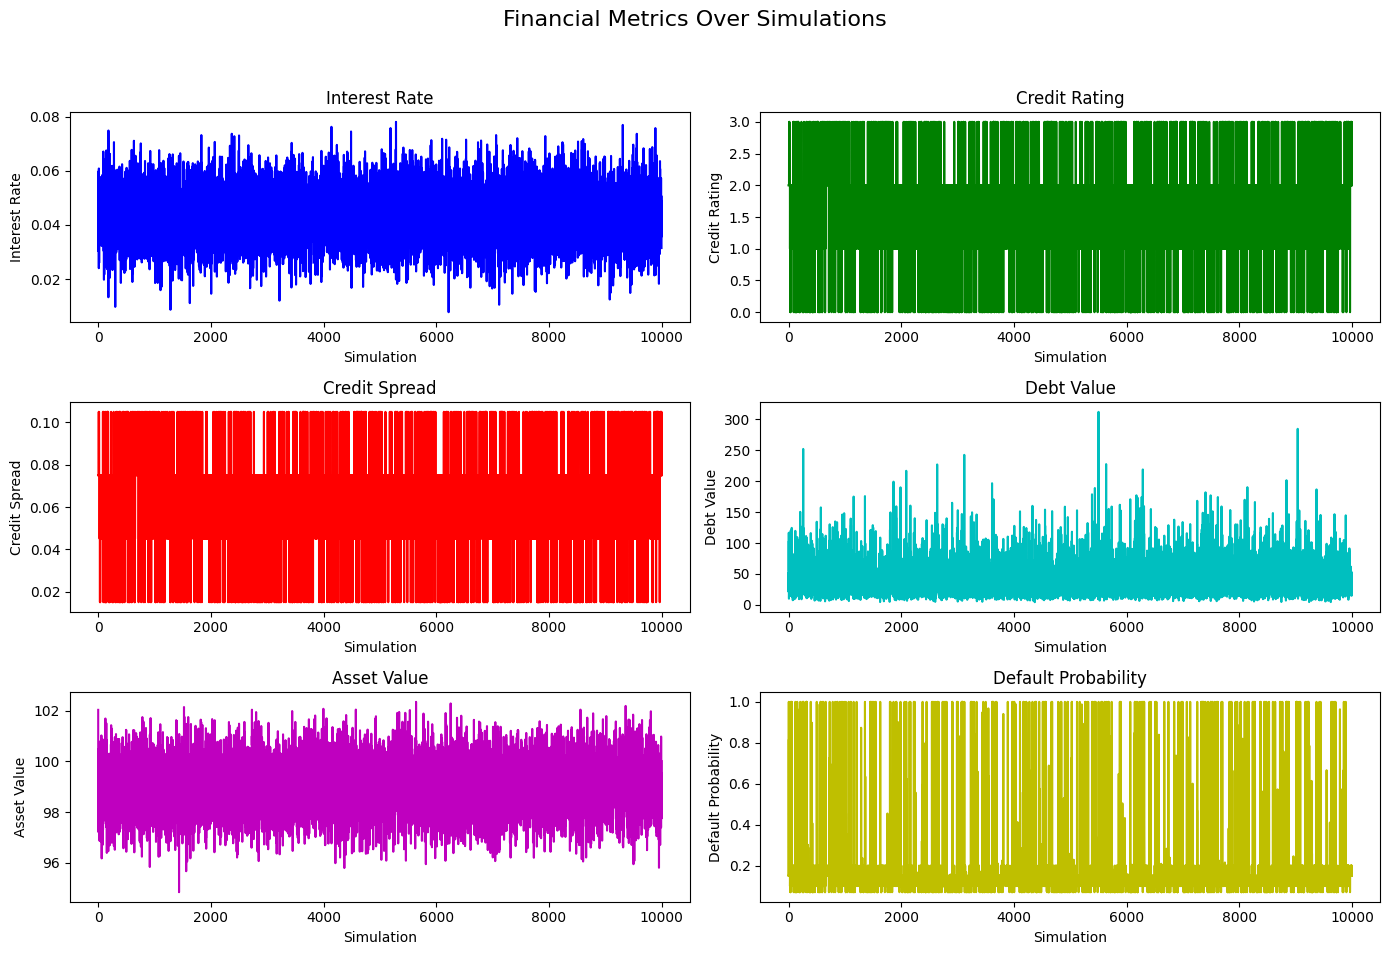

Combined Probability of Default (Base Scenario with Market_crash Stress Test): 0.1655000000


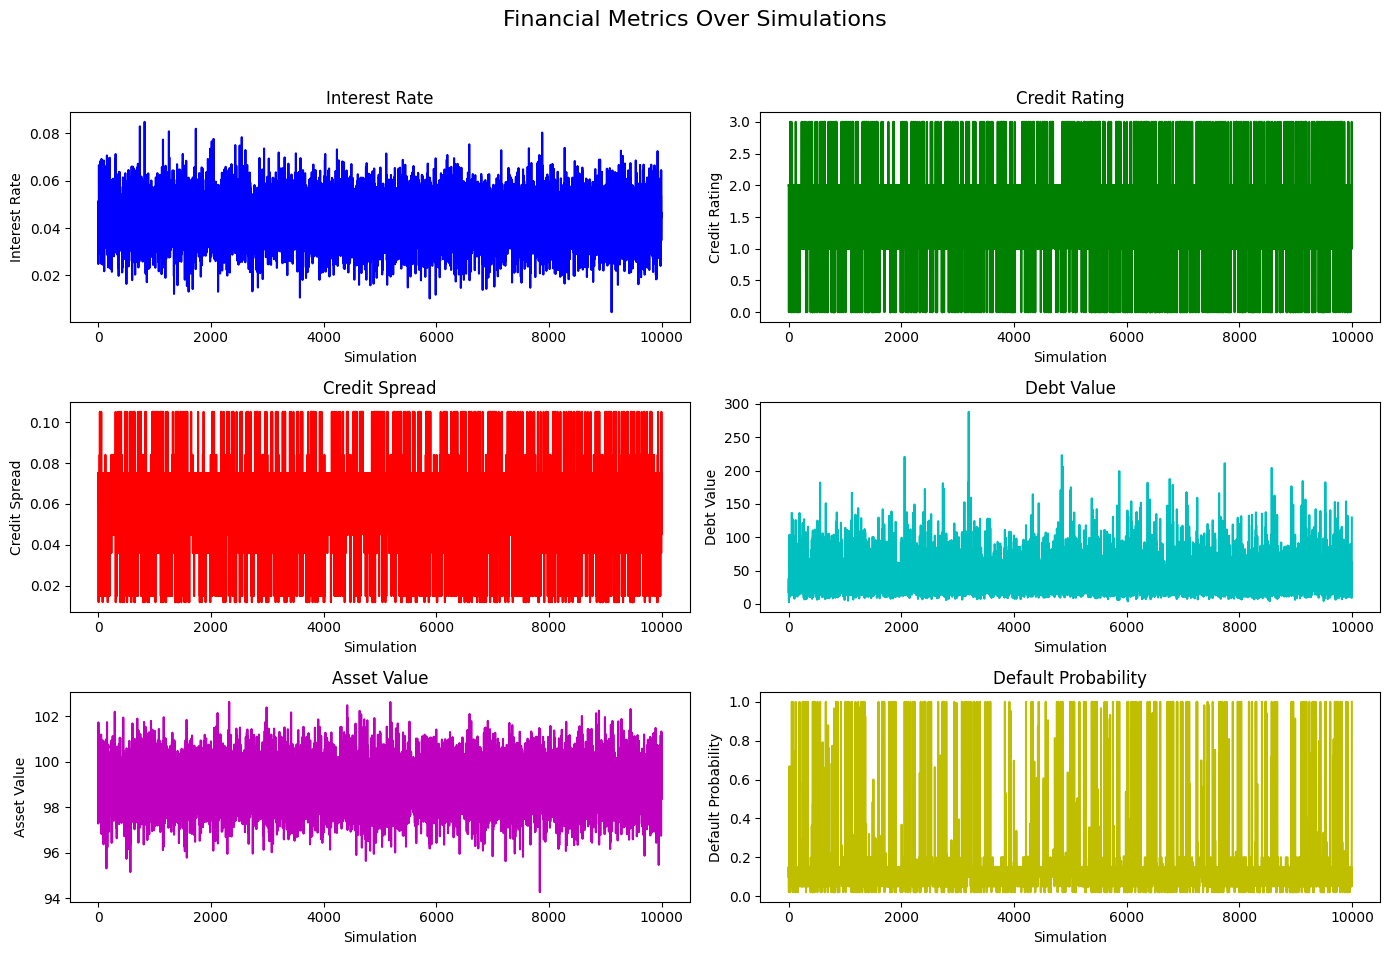

Combined Probability of Default (Base Scenario with Hyperinflation Stress Test): 0.1370000000


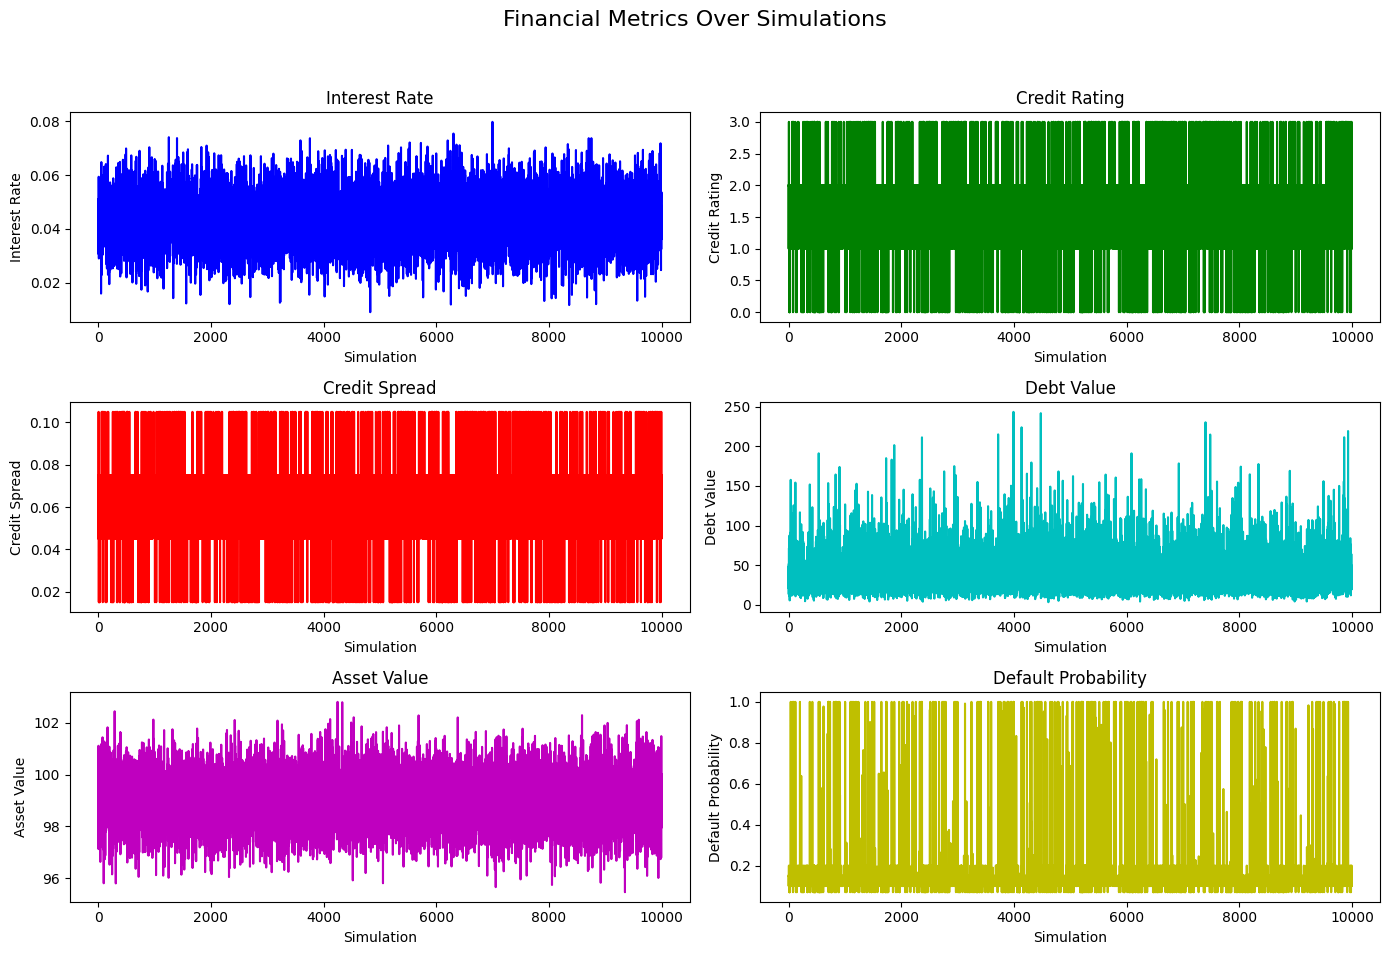

Combined Probability of Default (Base Scenario with Liquidity_shock Stress Test): 0.1655000000


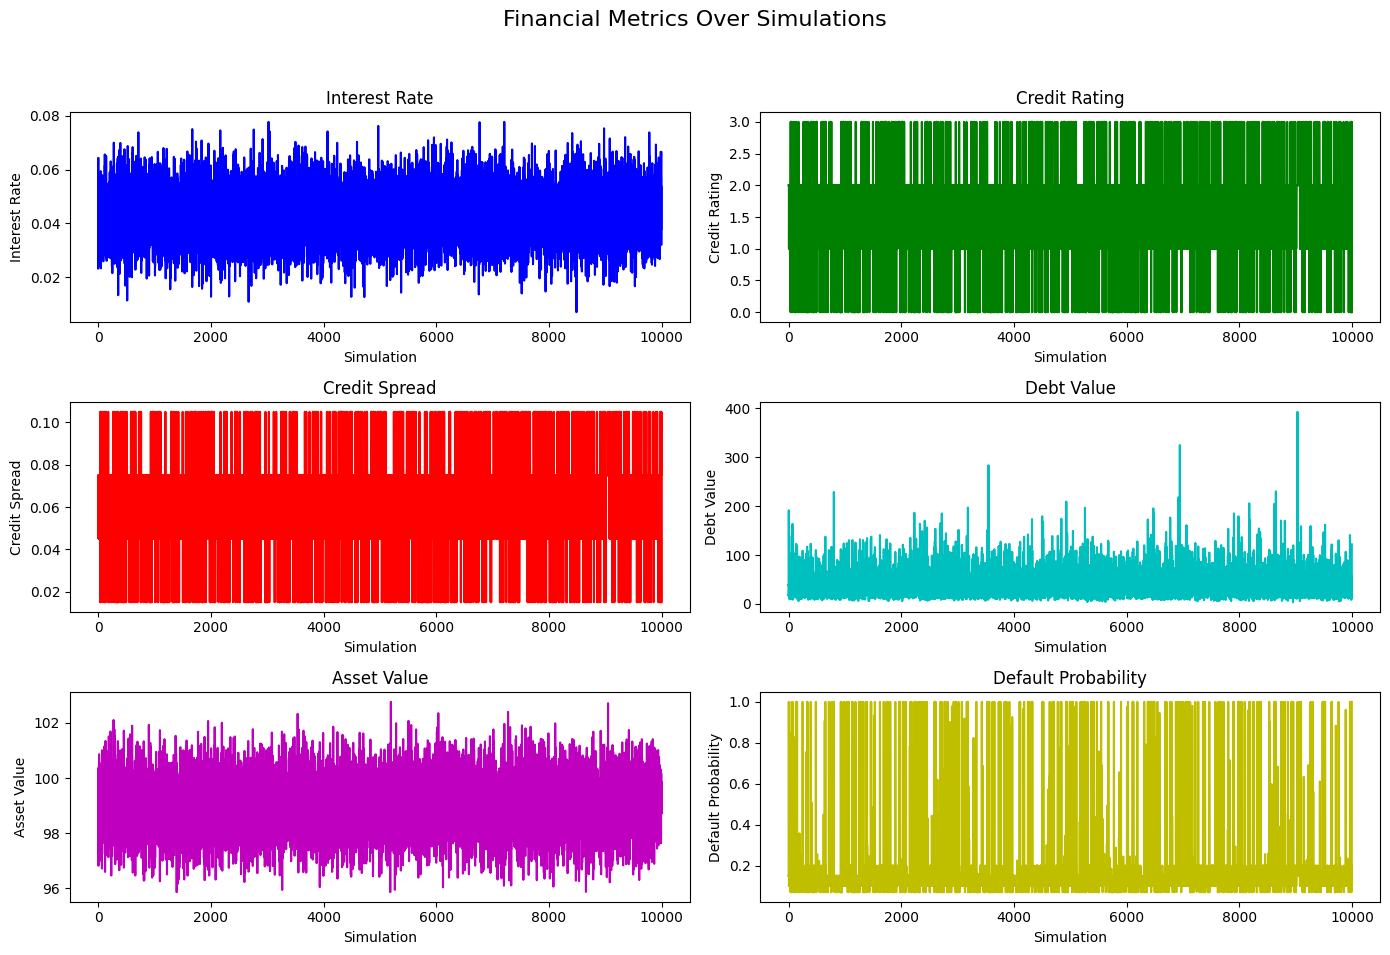

Combined Probability of Default (Recession Scenario with Market_crash Stress Test): 0.1680000000


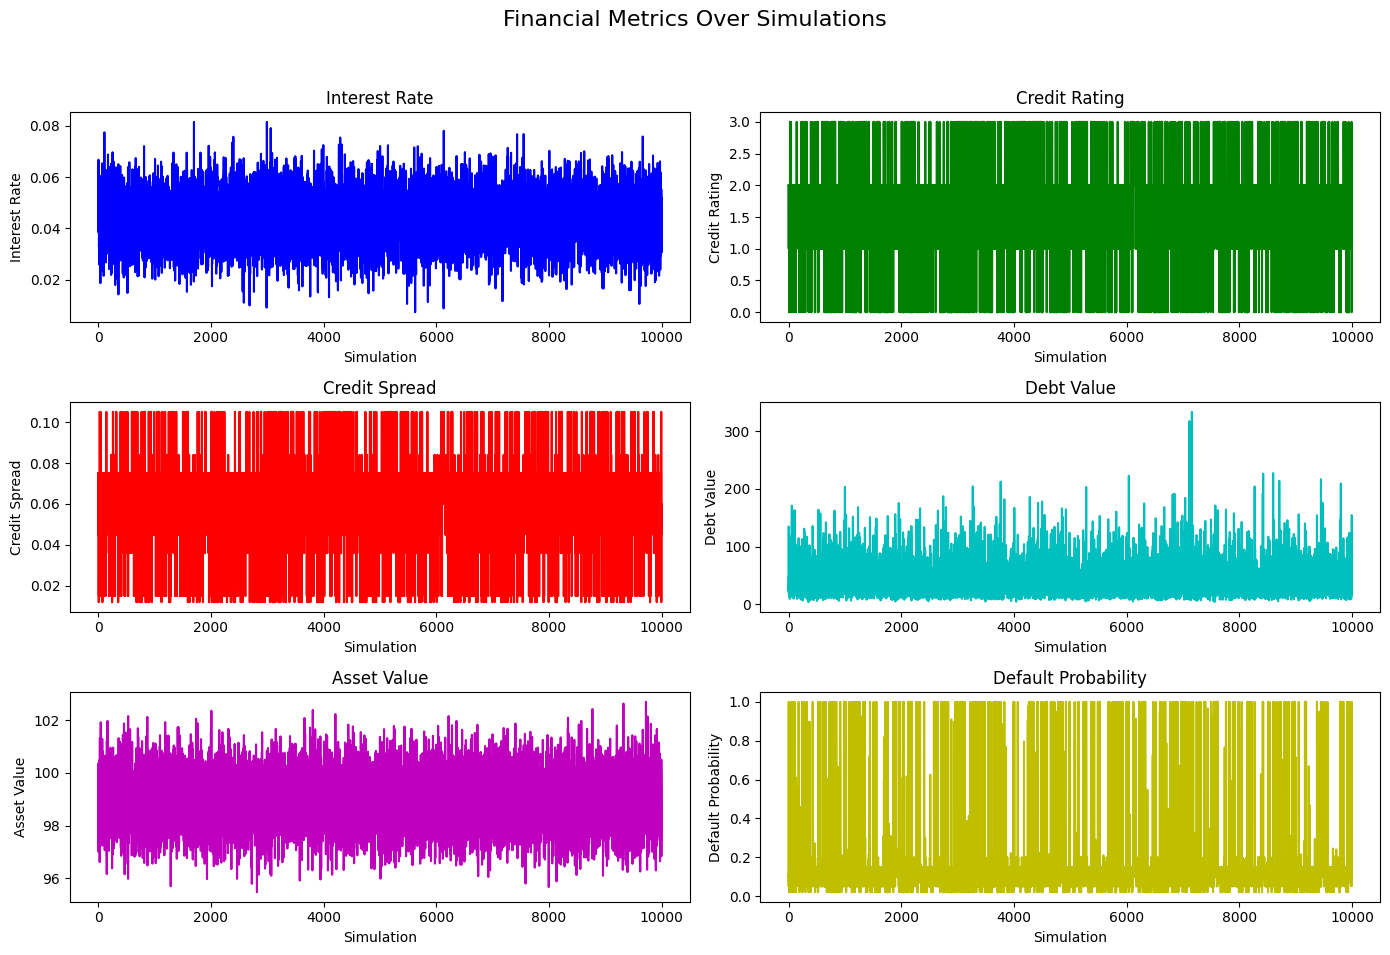

Combined Probability of Default (Recession Scenario with Hyperinflation Stress Test): 0.1427000000


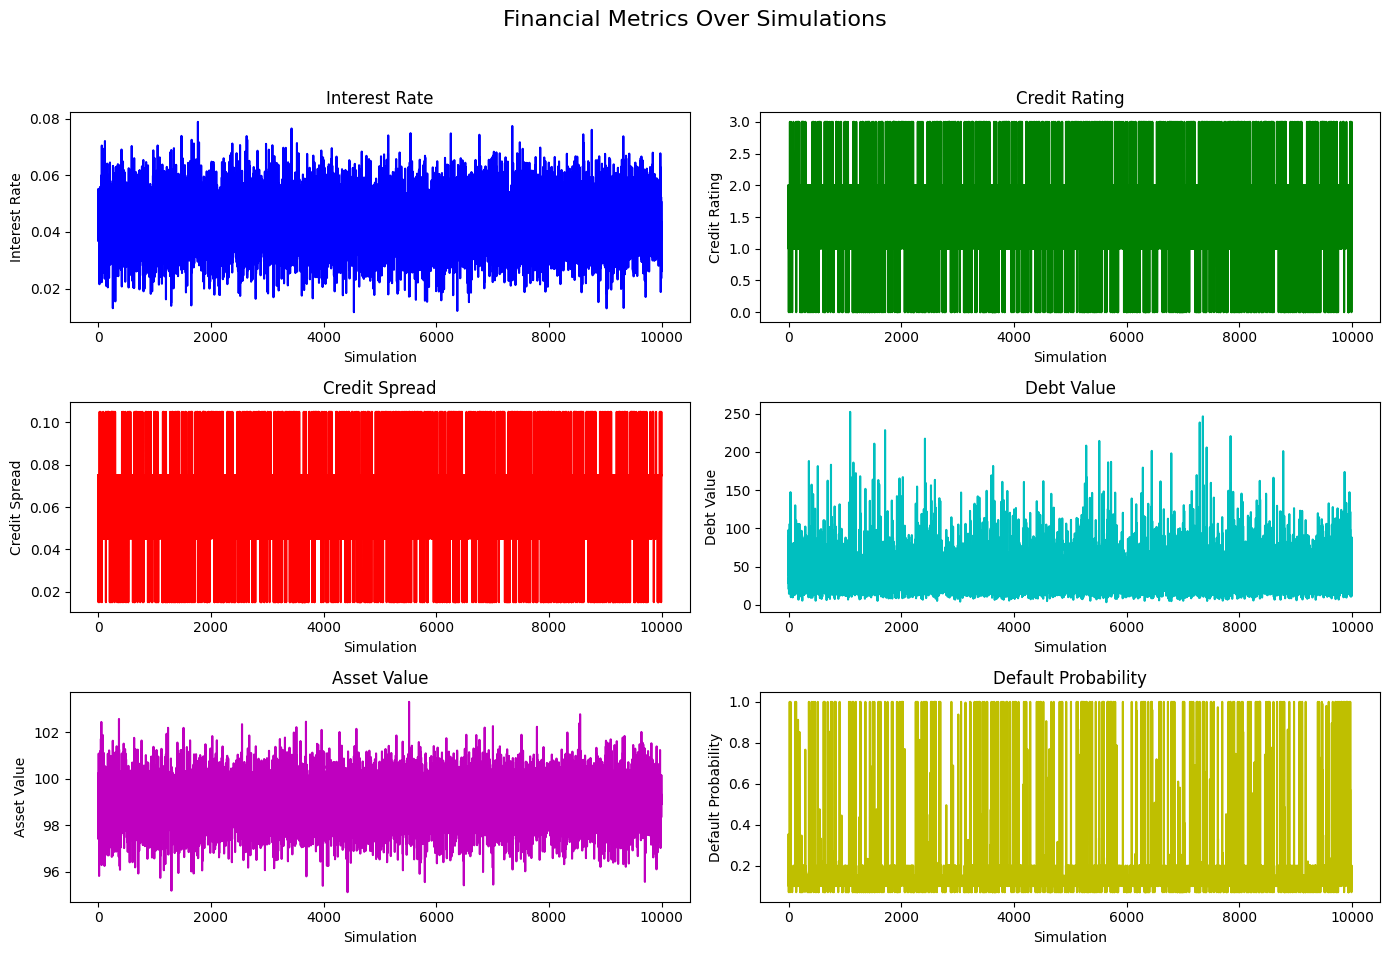

Combined Probability of Default (Recession Scenario with Liquidity_shock Stress Test): 0.1677000000


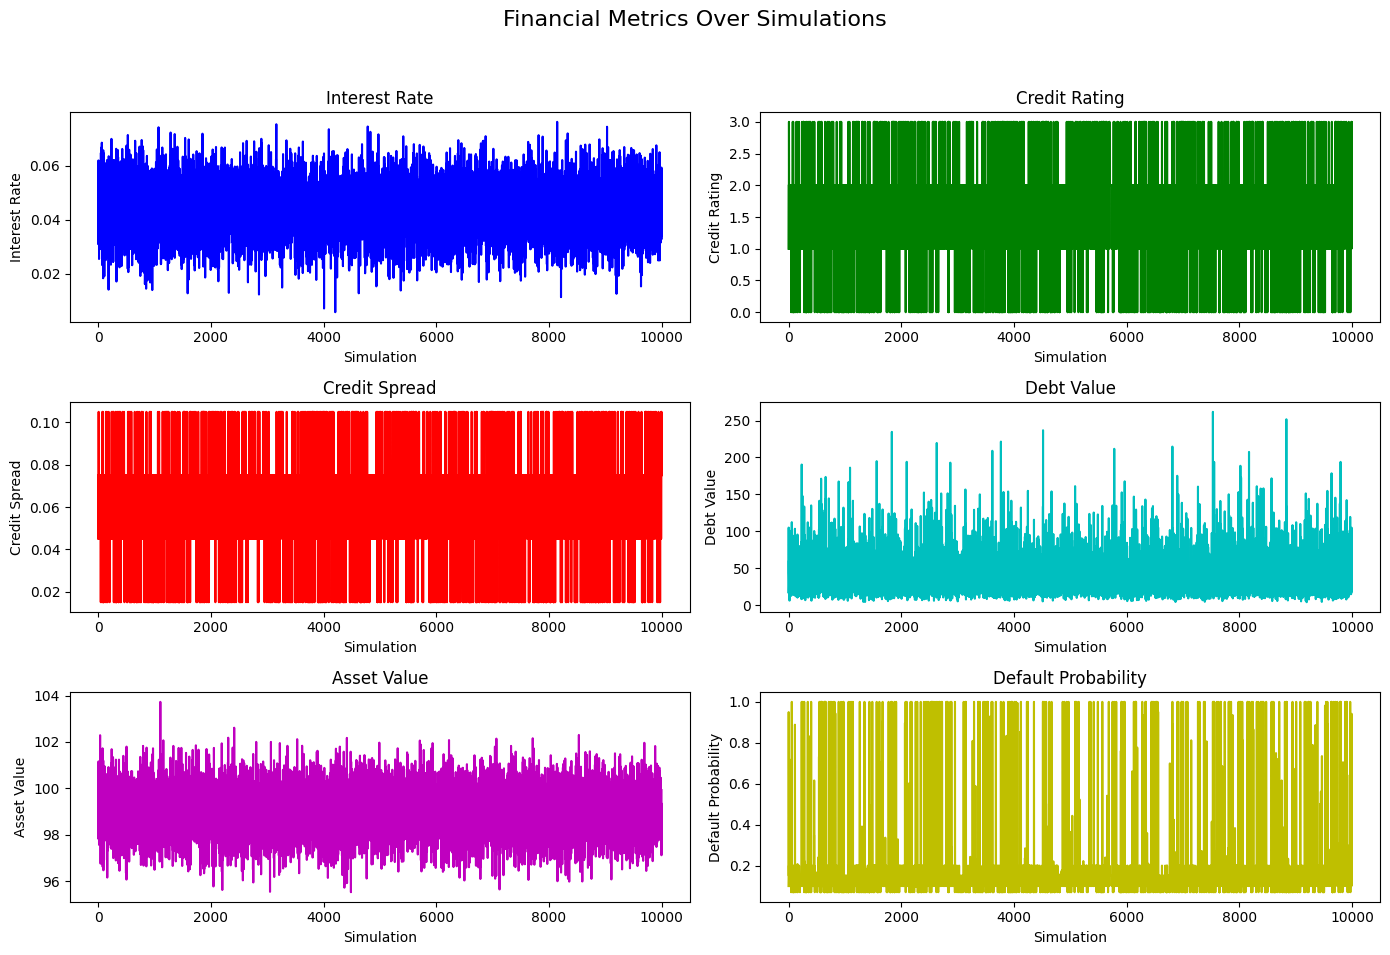

Combined Probability of Default (High_inflation Scenario with Market_crash Stress Test): 0.1685000000


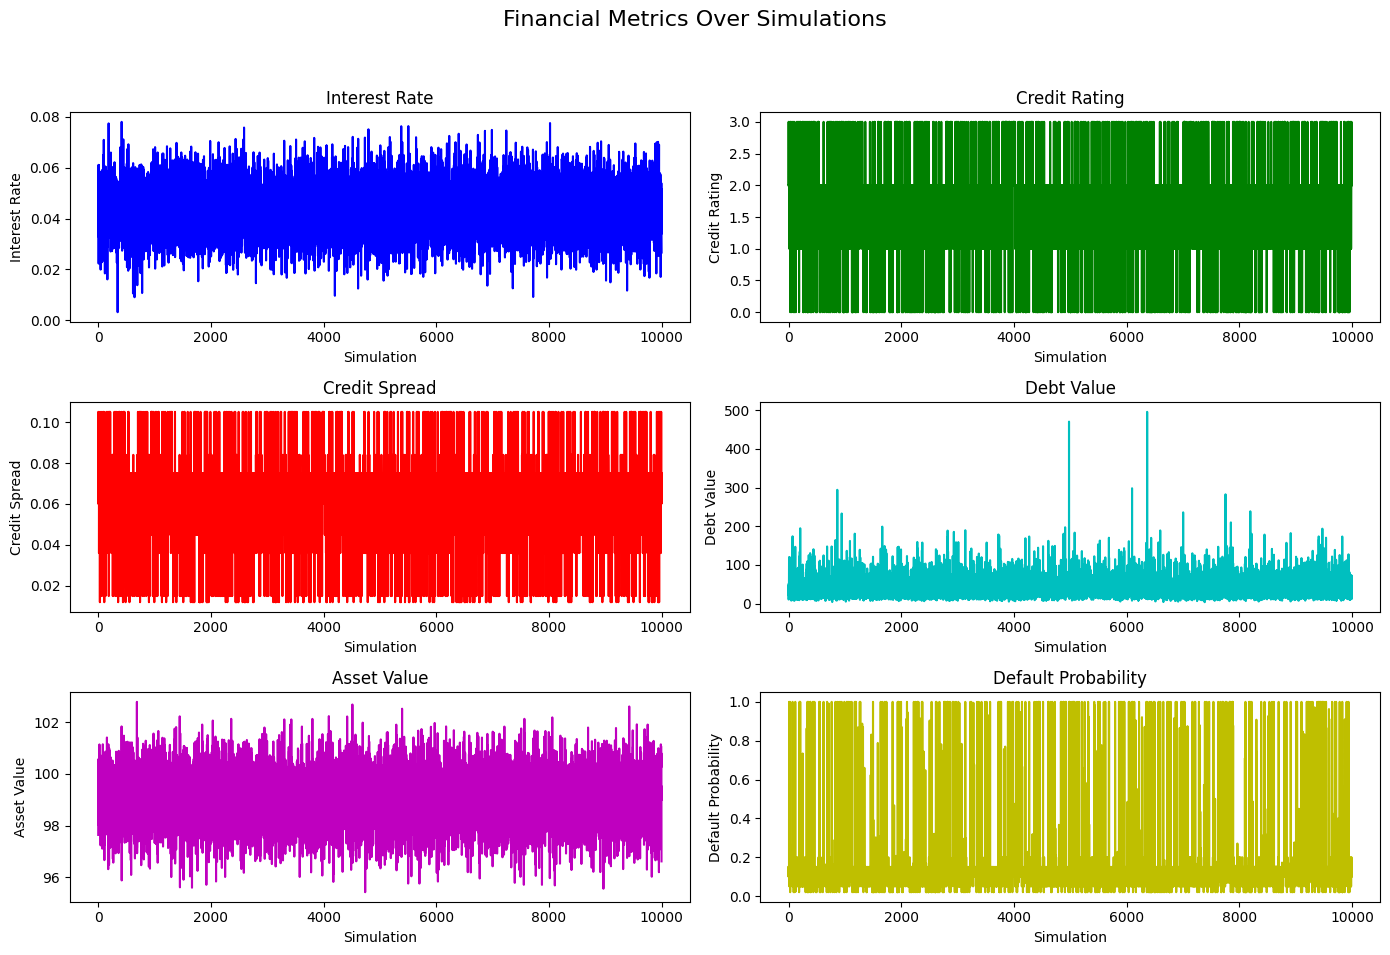

Combined Probability of Default (High_inflation Scenario with Hyperinflation Stress Test): 0.1380000000


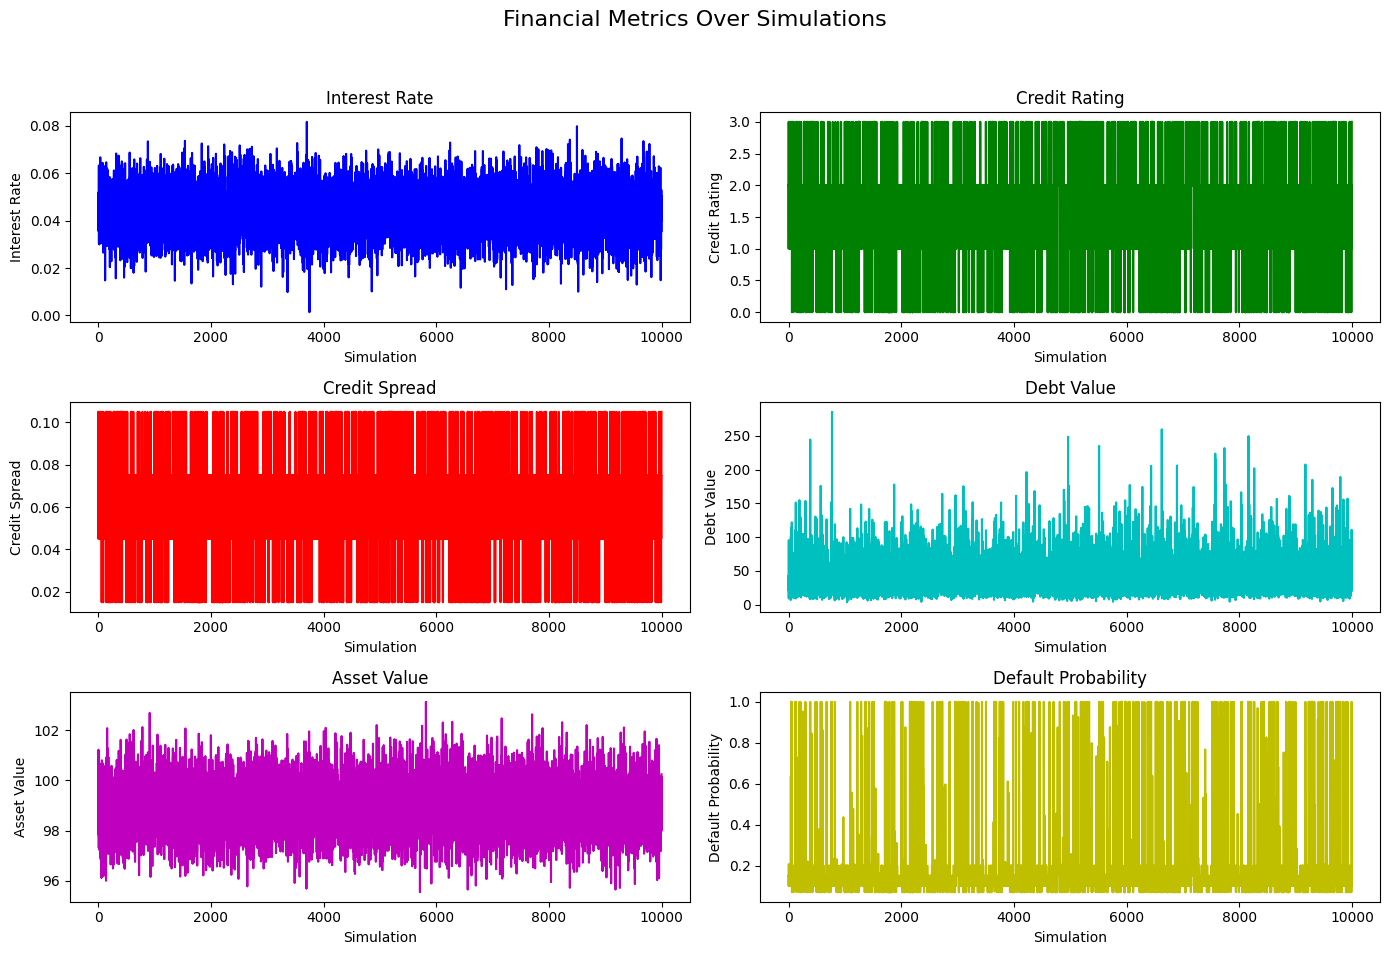

Combined Probability of Default (High_inflation Scenario with Liquidity_shock Stress Test): 0.1745000000


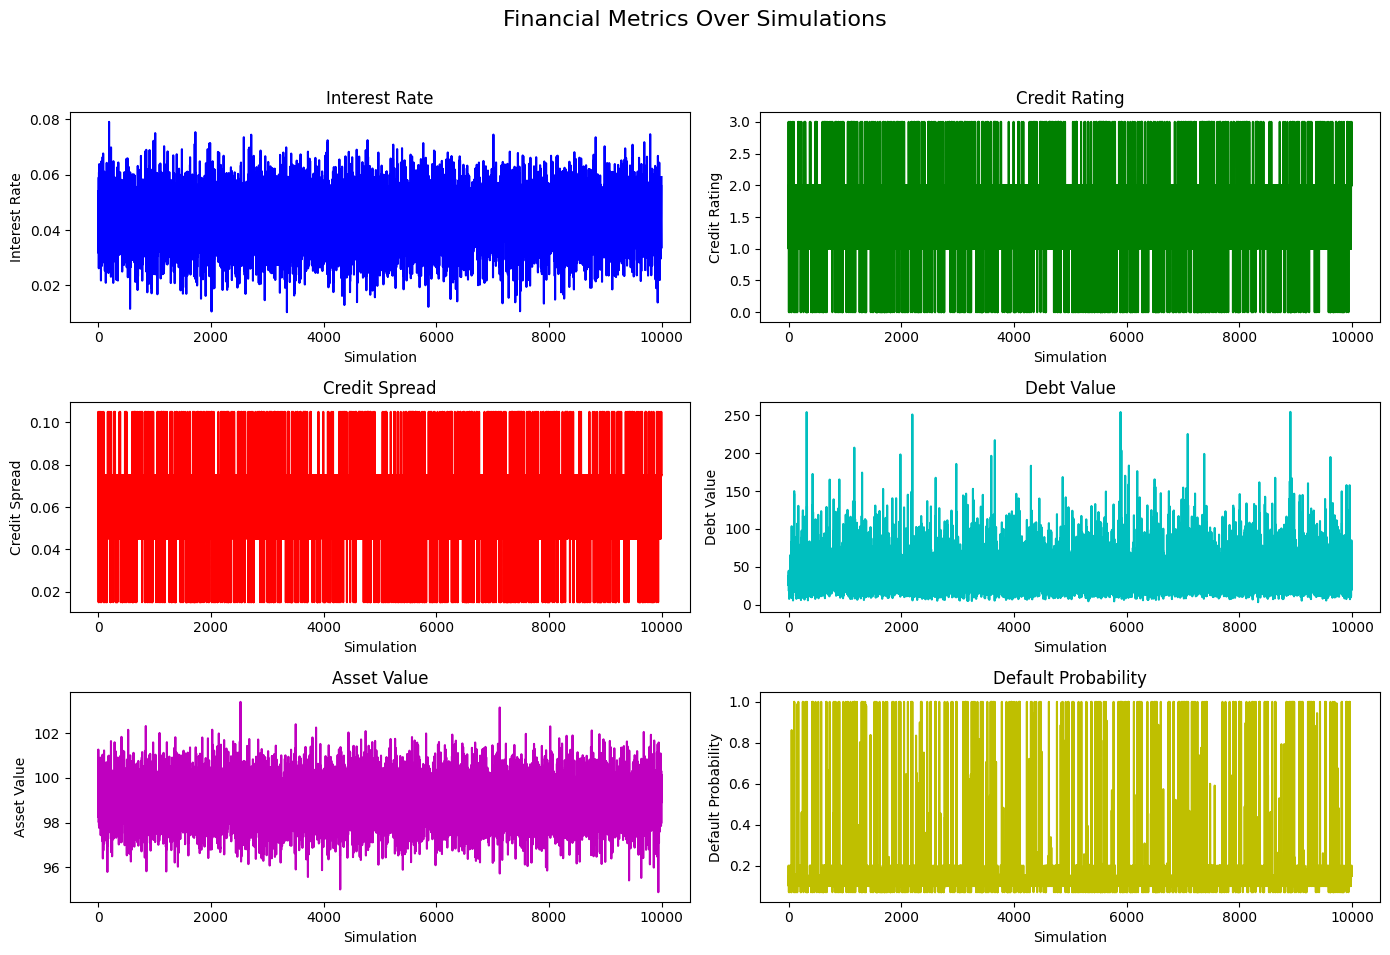

Combined Probability of Default (Stagnation Scenario with Market_crash Stress Test): 0.1705000000


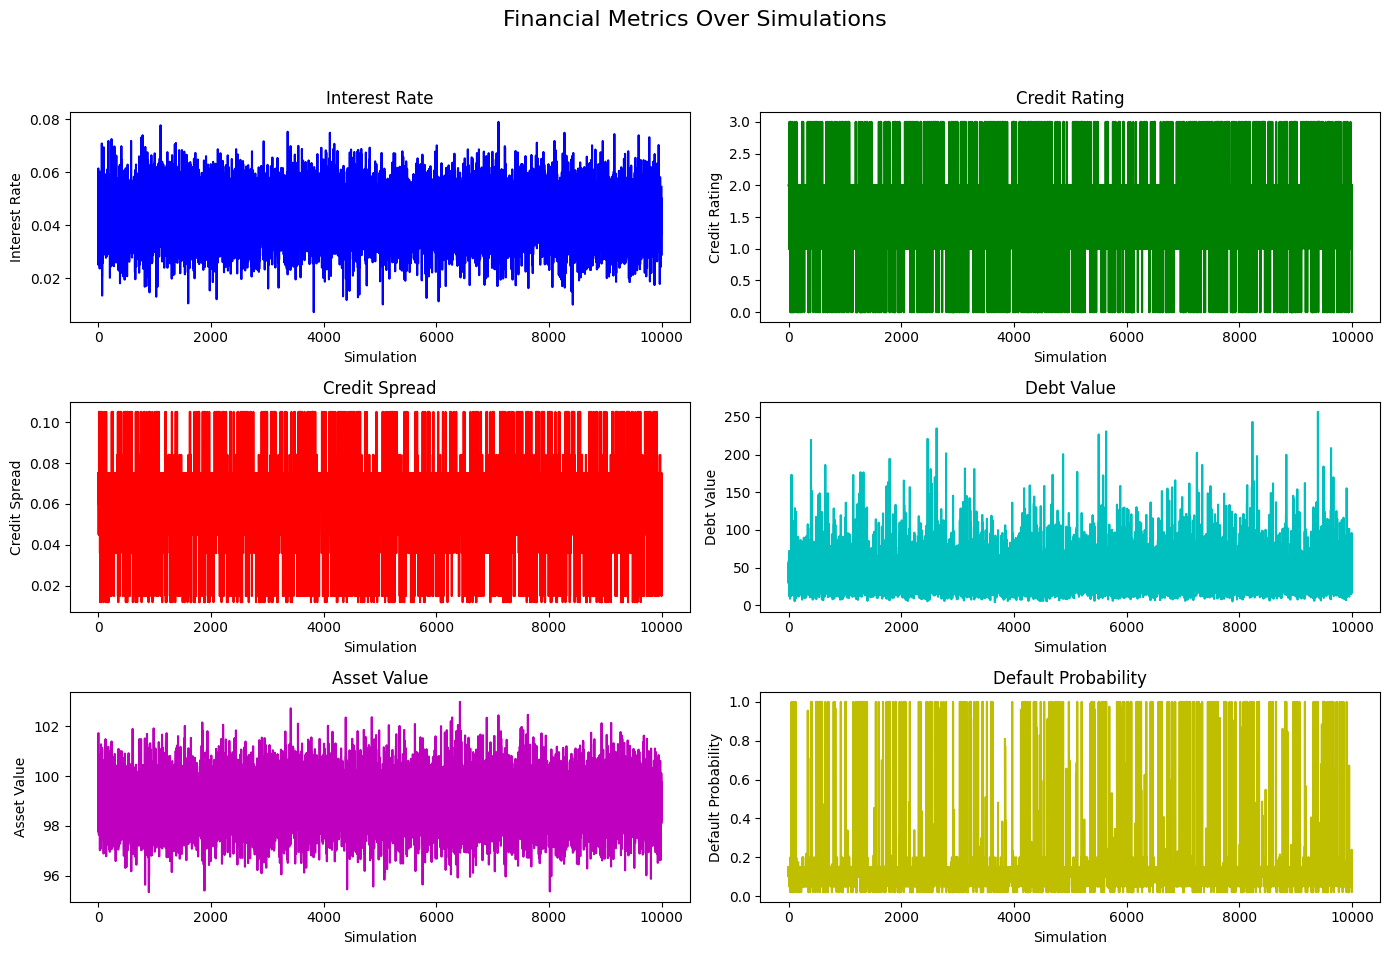

Combined Probability of Default (Stagnation Scenario with Hyperinflation Stress Test): 0.1370000000


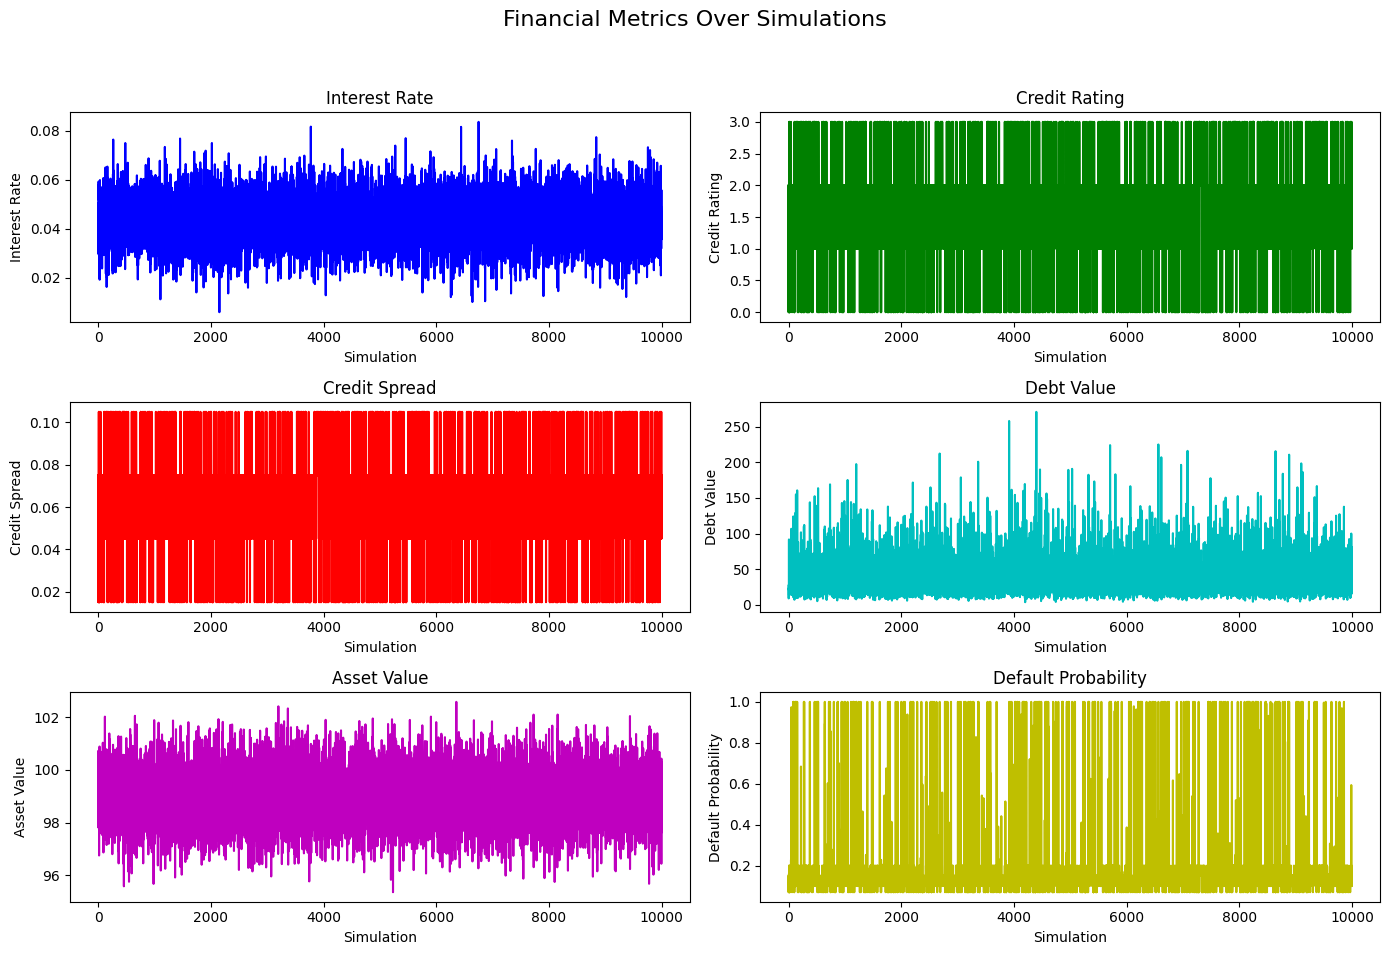

Combined Probability of Default (Stagnation Scenario with Liquidity_shock Stress Test): 0.1702000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def stress_test(macro_factors, scenario):
    """Apply a stress test scenario to macroeconomic factors."""
    if scenario == "market_crash":
        macro_factors['gdp_growth'] = np.random.uniform(-0.1, -0.05)
        macro_factors['inflation'] = np.random.uniform(0.02, 0.04)
        macro_factors['interest_rate'] = np.random.uniform(0.01, 0.03)
        macro_factors['sector_growth'] = np.random.uniform(-0.2, -0.1)
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.15)
        macro_factors['credit_spread'] = np.random.uniform(0.08, 0.15)
    elif scenario == "hyperinflation":
        macro_factors['gdp_growth'] = np.random.uniform(-0.02, 0.01)
        macro_factors['inflation'] = np.random.uniform(0.1, 0.3)
        macro_factors['interest_rate'] = np.random.uniform(0.15, 0.2)
        macro_factors['sector_growth'] = np.random.uniform(-0.05, 0.05)
        macro_factors['liquidity'] = np.random.uniform(0.2, 0.4)
        macro_factors['credit_spread'] = np.random.uniform(0.05, 0.1)
    elif scenario == "liquidity_shock":
        macro_factors['gdp_growth'] = np.random.uniform(-0.05, -0.02)
        macro_factors['inflation'] = np.random.uniform(0.03, 0.06)
        macro_factors['interest_rate'] = np.random.uniform(0.04, 0.06)
        macro_factors['sector_growth'] = np.random.uniform(-0.1, -0.05)
        macro_factors['liquidity'] = np.random.uniform(0.05, 0.1)
        macro_factors['credit_spread'] = np.random.uniform(0.1, 0.2)
    return macro_factors

def recovery_rate_by_priority(priority):
    """Simulate the recovery rate based on the priority of the debt."""
    if priority == 'senior':
        return np.random.normal(loc=0.8, scale=0.1)
    elif priority == 'subordinated':
        return np.random.normal(loc=0.6, scale=0.1)
    elif priority == 'junior':
        return np.random.normal(loc=0.4, scale=0.1)
    return 0.5

def adjust_transition_matrix_for_macro(transition_matrix, macro_factors):
    """Adjust credit rating transition matrix based on macroeconomic factors."""
    gdp_growth = macro_factors['gdp_growth']
    inflation = macro_factors['inflation']
    liquidity = macro_factors['liquidity']
    adjustment_factor = 0.05 * max(-gdp_growth, 0) + 0.02 * max(inflation - 0.05, 0) + 0.03 * max(0.1 - liquidity, 0)

    adjusted_matrix = []
    for row in transition_matrix:
        adjusted_row = [max(0, prob - adjustment_factor) for prob in row]
        row_sum = sum(adjusted_row)
        adjusted_matrix.append([prob / row_sum for prob in adjusted_row])
    return adjusted_matrix

def credit_spread_from_rating_and_macro(credit_rating, macro_factors):
    """Calculate credit spread based on credit rating and macroeconomic factors."""
    base_spreads = [0.01, 0.03, 0.05, 0.07, 0.10]
    spread = base_spreads[credit_rating]
    
    if macro_factors['gdp_growth'] < 0:
        spread *= 1.5
    elif macro_factors['inflation'] > 0.1:
        spread *= 1.2
    elif macro_factors['liquidity'] < 0.1:
        spread *= 1.3
    return spread

def credit_rating_transition(current_rating, transition_matrix):
    """Simulate credit rating transition using a transition matrix."""
    return np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_rating])

def adjust_default_probability(base_pd, credit_rating, macro_factors):
    """Adjust the default probability considering credit rating and macroeconomic factors."""
    rating_adjustment = [0.02, 0.05, 0.10, 0.15, 0.25]
    adjusted_pd = base_pd + rating_adjustment[credit_rating]
    
    if macro_factors['gdp_growth'] < -0.01:
        adjusted_pd += 0.05
    return min(1.0, adjusted_pd)


def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          cash_flow=20, profit_margin=0.15, debt_to_equity_ratio=2,
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1, stress_test_scenario=None):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, and jump-diffusion model."""
    default_counts = 0
    num_layers = len(debt_layers)
    mean = np.zeros(num_layers)
    time_horizon = 1  # Total time horizon in years
    dt = 0.01  # Time step for each simulation
    

    interest_rates_list = []
    credit_ratings_list = []
    credit_spreads_list = []
    debt_values_list = []
    asset_values_list = []
    default_probabilities_list = []

    # Define the credit rating transition matrix (example values)
    transition_matrix = [
        [0.9, 0.08, 0.02, 0.0, 0.0],  # AAA
        [0.1, 0.85, 0.05, 0.0, 0.0],  # AA
        [0.05, 0.1, 0.8, 0.05, 0.0],  # A
        [0.05, 0.05, 0.1, 0.7, 0.1],  # BBB
        [0.0, 0.05, 0.1, 0.2, 0.65]   # BB
    ]

    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        if stress_test_scenario:
            macro_factors = stress_test(macro_factors, stress_test_scenario)

        credit_rating = 2 
        adjusted_transition_matrix = adjust_transition_matrix_for_macro(transition_matrix, macro_factors)
        credit_rating = credit_rating_transition(credit_rating, adjusted_transition_matrix)
        credit_spread = credit_spread_from_rating_and_macro(credit_rating, macro_factors)
        adjusted_correlation_matrix = dynamic_correlation_matrix(macro_factors, correlation_matrix)
        correlated_shocks = multivariate_normal.rvs(mean=mean, cov=adjusted_correlation_matrix)
        asset_value_adjustment, asset_volatility_adjustment = simulate_firm_specific_risks(cash_flow, profit_margin, debt_to_equity_ratio)
        
        adjusted_asset_value = current_asset_value * asset_value_adjustment
        adjusted_volatility = np.random.uniform(vol_min, vol_max) * asset_volatility_adjustment
        debt_value = debt_layers[0]['value'] 

        for _ in range(int(time_horizon / dt)):
            risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
            debt_value = update_debt_value(debt_value, leverage_min, leverage_max)

        interest_rates_list.append(risk_free_rate)
        credit_ratings_list.append(credit_rating)
        credit_spreads_list.append(credit_spread)
        debt_values_list.append(debt_value)
        asset_values_list.append(adjusted_asset_value)
        
        base_pd = norm.cdf(-((np.log(adjusted_asset_value / debt_value) +
                              (risk_free_rate + 0.5 * adjusted_volatility ** 2) * debt_layers[0]['maturity']) /
                              (adjusted_volatility * np.sqrt(debt_layers[0]['maturity']))))
        adjusted_pd = adjust_default_probability(base_pd, credit_rating, macro_factors)
        default_probabilities_list.append(adjusted_pd)

        if np.random.uniform(0, 1) < adjusted_pd:
            default_counts += 1

    pd_combined = default_counts / num_simulations
    plot_metrics(interest_rates_list, credit_ratings_list, credit_spreads_list, debt_values_list, asset_values_list, default_probabilities_list)
    return pd_combined

def plot_metrics(interest_rates, credit_ratings, credit_spreads, debt_values, asset_values, default_probabilities):
    """Plot key financial metrics over simulations."""
    time_steps = np.arange(len(interest_rates))  # Assuming all metrics have the same length

    fig, axs = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle('Financial Metrics Over Simulations', fontsize=16)

    axs[0, 0].plot(time_steps, interest_rates, label="Interest Rate", color='b')
    axs[0, 0].set_title("Interest Rate")
    axs[0, 0].set_xlabel("Simulation")
    axs[0, 0].set_ylabel("Interest Rate")

    axs[0, 1].plot(time_steps, credit_ratings, label="Credit Rating", color='g')
    axs[0, 1].set_title("Credit Rating")
    axs[0, 1].set_xlabel("Simulation")
    axs[0, 1].set_ylabel("Credit Rating")

    axs[1, 0].plot(time_steps, credit_spreads, label="Credit Spread", color='r')
    axs[1, 0].set_title("Credit Spread")
    axs[1, 0].set_xlabel("Simulation")
    axs[1, 0].set_ylabel("Credit Spread")

    axs[1, 1].plot(time_steps, debt_values, label="Debt Value", color='c')
    axs[1, 1].set_title("Debt Value")
    axs[1, 1].set_xlabel("Simulation")
    axs[1, 1].set_ylabel("Debt Value")

    axs[2, 0].plot(time_steps, asset_values, label="Asset Value", color='m')
    axs[2, 0].set_title("Asset Value")
    axs[2, 0].set_xlabel("Simulation")
    axs[2, 0].set_ylabel("Asset Value")

    axs[2, 1].plot(time_steps, default_probabilities, label="Default Probability", color='y')
    axs[2, 1].set_title("Default Probability")
    axs[2, 1].set_xlabel("Simulation")
    axs[2, 1].set_ylabel("Default Probability")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
asset_value = 100
initial_risk_free_rate = 0.043
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]
correlation_matrix = [
    [1.0, 0.8, 0.6],
    [0.8, 1.0, 0.7],
    [0.6, 0.7, 1.0]
]
scenarios = ["base", "recession", "high_inflation", "stagnation"]
stress_scenarios = ["market_crash", "hyperinflation", "liquidity_shock"]

for scenario in scenarios:
    for stress_scenario in stress_scenarios:
        pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, correlation_matrix, 
                                   scenario=scenario, cash_flow=25, profit_margin=0.25, debt_to_equity_ratio=0.7, 
                                   stress_test_scenario=stress_scenario)
        print(f"Combined Probability of Default ({scenario.capitalize()} Scenario with {stress_scenario.capitalize()} Stress Test): {pd:.10f}")


Realistic Debt Restructuring and Early Payment Events (doesnt work properly)

	•	Current Limitation: The model assumes that debt is only affected by volatility and leverage adjustments, without accounting for events like early repayments or restructuring.
	•	Improvement: Simulate early debt repayments, refinancing, or restructuring events that can impact the overall capital structure and default risk.
	•	Implementation: Introduce probabilities of early repayment or restructuring at each time step, which would decrease debt value and possibly reduce default probability.

In [21]:
import numpy as np
from scipy.stats import norm, poisson

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def simulate_macro_factors(scenario):
    """Simulate macroeconomic factors based on specified scenario."""
    if scenario == "recession":
        return {
            'gdp_growth': np.random.uniform(-0.06, -0.02),
            'inflation': np.random.uniform(0.01, 0.03),
            'interest_rate': np.random.uniform(0.02, 0.04),
            'sector_growth': np.random.uniform(-0.05, -0.02),
            'liquidity': np.random.uniform(0.1, 0.3),
            'credit_spread': np.random.uniform(0.02, 0.05),
        }
    elif scenario == "high_inflation":
        return {
            'gdp_growth': np.random.uniform(0.01, 0.03),
            'inflation': np.random.uniform(0.06, 0.1),
            'interest_rate': np.random.uniform(0.05, 0.08),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.2, 0.4),
            'credit_spread': np.random.uniform(0.01, 0.03),
        }
    elif scenario == "stagnation":
        return {
            'gdp_growth': np.random.uniform(-0.01, 0.01),
            'inflation': np.random.uniform(0.02, 0.04),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.01),
            'liquidity': np.random.uniform(0.3, 0.5),
            'credit_spread': np.random.uniform(0.01, 0.03),
        }
    else:  # base scenario
        return {
            'gdp_growth': np.random.uniform(-0.02, 0.04),
            'inflation': np.random.uniform(0.01, 0.05),
            'interest_rate': np.random.uniform(0.03, 0.05),
            'sector_growth': np.random.uniform(-0.01, 0.03),
            'liquidity': np.random.uniform(0.3, 0.7),
            'credit_spread': np.random.uniform(0.01, 0.02),
        }

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on liquidity and credit spread."""
    liquidity_factor = 1 + 1.5 * (1 - macro_factors['liquidity'])
    spread_factor = 1 + 2 * macro_factors['credit_spread']
    
    adjusted_pd = base_pd * liquidity_factor * spread_factor
    
    return min(1.0, adjusted_pd)

def simulate_early_repayment_or_restructuring(probability):
    """Simulate early repayment or debt restructuring events."""
    return np.random.uniform(0, 1) < probability

def multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, num_simulations=10000,
                          vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                          a=0.1, b=0.05, sigma=0.01, scenario="base", 
                          jump_intensity=0.1, jump_mean=-0.2, jump_volatility=0.1,
                          early_repayment_probability=0.15):
    """Calculate the probability of default considering multiple debt layers under different scenarios, firm-specific risks, jump-diffusion, and early repayment/restructuring events."""
    default_counts = 0
    for _ in range(num_simulations):
        risk_free_rate = initial_risk_free_rate
        current_asset_value = asset_value
        macro_factors = simulate_macro_factors(scenario)

        for i, layer in enumerate(debt_layers):
            time_horizon = layer['maturity']
            debt_value = layer['value']

            dt = 0.01
            time_steps = int(time_horizon / dt)

            for _ in range(time_steps):
                # Simulate interest rate using Vasicek model
                risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                # Randomly adjust debt value based on leverage
                debt_value = debt_value * np.random.uniform(leverage_min, leverage_max)

                # Check if early repayment or debt restructuring occurs
                if simulate_early_repayment_or_restructuring(early_repayment_probability):
                    debt_value *= np.random.uniform(0.7, 0.9)  # Debt reduced by 10-30%

            # Base probability of default
            base_pd = norm.cdf(-((np.log(current_asset_value / debt_value) +
                                  (risk_free_rate + 0.5 * vol_max ** 2) * time_horizon) /
                                  (vol_max * np.sqrt(time_horizon))))
            

            # Adjust the probability of default with liquidity, credit spread, and firm-specific factors
            adjusted_pd = adjust_default_probability(base_pd, macro_factors)

            if np.random.uniform(0, 1) < adjusted_pd:
                default_counts += 1
                break

    pd_combined = default_counts / num_simulations
    return pd_combined

# Example usage with early repayment or debt restructuring
asset_value = 100
initial_risk_free_rate = 0.05
debt_layers = [
    {'value': 40, 'maturity': 0.5, 'priority': 'senior'},
    {'value': 30, 'maturity': 1.0, 'priority': 'subordinated'},
    {'value': 20, 'maturity': 2.0, 'priority': 'junior'}
]

# Run the model for different scenarios
scenarios = ["base", "recession", "high_inflation", "stagnation"]
for scenario in scenarios:
    pd = multi_layer_merton_pd(asset_value, debt_layers, initial_risk_free_rate, scenario=scenario, early_repayment_probability=0.15)
    print(f"Combined Probability of Default ({scenario.capitalize()} Scenario): {pd:.10f}")


Combined Probability of Default (Base Scenario): 0.0000000000
Combined Probability of Default (Recession Scenario): 0.0002000000
Combined Probability of Default (High_inflation Scenario): 0.0000000000
Combined Probability of Default (Stagnation Scenario): 0.0000000000


For portfolio only

In [11]:
import numpy as np
from scipy.stats import norm, multivariate_normal

def vasicek_model(r, a, b, sigma, dt):
    """Simulate one step of the Vasicek model for interest rates."""
    dW = np.random.normal(0, np.sqrt(dt))
    dr = a * (b - r) * dt + sigma * dW
    return r + dr

def update_debt_value(debt_value, leverage_min, leverage_max):
    """Randomly adjust debt value based on leverage ratio constraints."""
    leverage_ratio = np.random.uniform(leverage_min, leverage_max)
    return debt_value * leverage_ratio

def simulate_macro_factors():
    """Simulate macroeconomic factors using random values."""
    return {
        'gdp_growth': np.random.uniform(-0.02, 0.04),  # GDP growth between -2% and 4%
        'inflation': np.random.uniform(0.01, 0.05),    # Inflation between 1% and 5%
        'sector_growth': np.random.uniform(-0.01, 0.03) # Sector growth between -1% and 3%
    }

def adjust_volatility_with_macro(asset_volatility, macro_factors):
    """Adjust asset volatility based on macroeconomic factors."""
    adjusted_volatility = asset_volatility * (1 + 0.5 * macro_factors['inflation'] - 0.3 * macro_factors['gdp_growth'])
    return max(0.1, adjusted_volatility)  # Ensure a minimum volatility level

def adjust_default_probability(base_pd, macro_factors):
    """Adjust the probability of default based on macroeconomic factors."""
    adjustment_factor = 1 + 2 * (-macro_factors['gdp_growth']) + 1.5 * macro_factors['inflation']
    adjusted_pd = base_pd * adjustment_factor
    return min(1.0, adjusted_pd)  # Ensure probability does not exceed 100%

def multi_firm_default_simulation(firms, initial_risk_free_rate, num_simulations=10000, 
                                  correlation=0.5, vol_min=0.2, vol_max=0.5, leverage_min=0.9, leverage_max=1.1,
                                  a=0.1, b=0.05, sigma=0.01):
    """
    Calculate the probability of correlated defaults in a portfolio of firms using a Gaussian copula.
    
    Parameters:
        firms (list of dict): Each firm is a dictionary with 'asset_value', 'debt_layers' and 'volatility' keys.
        initial_risk_free_rate (float): Initial risk-free interest rate (annualized).
        num_simulations (int): Number of Monte Carlo simulations for default correlation.
        correlation (float): Correlation factor for copula model, simulating shared default risk.
        vol_min (float): Minimum volatility to simulate.
        vol_max (float): Maximum volatility to simulate.
    
    Returns:
        float: Portfolio probability of correlated default based on simulations.
    """
    # Set up copula correlation matrix for multiple firms
    correlation_matrix = np.full((len(firms), len(firms)), correlation)
    np.fill_diagonal(correlation_matrix, 1)  # Set diagonal to 1 for each firm

    # Generate correlated random variables for default determination
    mvn = multivariate_normal(mean=np.zeros(len(firms)), cov=correlation_matrix)
    
    correlated_defaults = 0
    
    for _ in range(num_simulations):
        # Shared macroeconomic factors
        macro_factors = simulate_macro_factors()
        
        # Draw correlated random samples for each firm
        correlated_random_values = mvn.rvs()
        
        firm_defaults = 0
        for i, firm in enumerate(firms):
            asset_value = firm['asset_value']
            debt_layers = firm['debt_layers']
            risk_free_rate = initial_risk_free_rate
            current_asset_value = asset_value
            
            # Simulate asset values and risk-free rates for each debt layer's maturity
            for layer in debt_layers:
                time_horizon = layer['maturity']
                debt_value = layer['value']
                
                # Update debt values and risk-free rates over time
                dt = 0.01
                time_steps = int(time_horizon / dt)
                for _ in range(time_steps):
                    risk_free_rate = vasicek_model(risk_free_rate, a, b, sigma, dt)
                    debt_value = update_debt_value(debt_value, leverage_min, leverage_max)
                
                # Adjust asset volatility based on macro factors
                asset_volatility = np.random.uniform(vol_min, vol_max)
                asset_volatility = adjust_volatility_with_macro(asset_volatility, macro_factors)
                
                # Calculate probability of default for this firm and debt layer
                drift = (risk_free_rate - 0.5 * asset_volatility**2) * time_horizon
                diffusion = asset_volatility * np.sqrt(time_horizon) * correlated_random_values[i]
                simulated_asset_value = current_asset_value * np.exp(drift + diffusion)
                
                # Base default probability for this firm and debt layer
                base_pd = norm.cdf(-((np.log(simulated_asset_value / debt_value) + 
                                      (risk_free_rate + 0.5 * asset_volatility ** 2) * time_horizon) / 
                                      (asset_volatility * np.sqrt(time_horizon))))
                
                # Adjusted probability of default with macro factors
                adjusted_pd = adjust_default_probability(base_pd, macro_factors)
                
                # Simulate default event
                if np.random.uniform(0, 1) < adjusted_pd:
                    firm_defaults += 1
                    break  # Default occurred for this firm
        
        # Check for correlated default event
        if firm_defaults > 0:
            correlated_defaults += 1

    # Calculate portfolio probability of correlated defaults
    portfolio_pd = correlated_defaults / num_simulations
    return portfolio_pd

# Example portfolio with multiple firms
firms = [
    {
        'asset_value': 100,
        'debt_layers': [
            {'value': 40, 'maturity': 0.5},
            {'value': 30, 'maturity': 1.0},
            {'value': 20, 'maturity': 2.0}
        ]
    },
    {
        'asset_value': 120,
        'debt_layers': [
            {'value': 60, 'maturity': 1.0},
            {'value': 30, 'maturity': 1.5},
            {'value': 20, 'maturity': 2.5}
        ]
    },
    {
        'asset_value': 80,
        'debt_layers': [
            {'value': 20, 'maturity': 0.75},
            {'value': 40, 'maturity': 1.25},
            {'value': 10, 'maturity': 1.75}
        ]
    }
]

initial_risk_free_rate = 0.05

# Run the portfolio model with default correlation
portfolio_pd = multi_firm_default_simulation(firms, initial_risk_free_rate, correlation=0.3)
print(f"Portfolio Probability of Correlated Default: {portfolio_pd:.10f}")

Portfolio Probability of Correlated Default: 0.3107000000
